<a href="https://colab.research.google.com/github/mamrsantos/Desafio_ANTT_AB/blob/main/Script_Desafio_Antt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estratégia e Planejamento do Projeto

<p align = "justify">

**Definindo um objetivo**

O objetivo do projeto é construir um modelo preditivo e mensurar a probabilidade de ocorrência de acidentes com vítimas em um determinado trecho da Rodovia administrado pela ECO101.

**Ganhos esperados com a solução?**

- Mapear os atributos que desempenham um papel fundamental nos desfechos dos acidentes com vítimas; 
- Prever a probabilidade de acidentes com vítimas em determinado trecho.

**Método de Análise - Etapas**

1. **WebScraping dos dados no Site:** Coleta dos dados no site da ANTT e criação do criação do banco de dados SQLlite.(Site:'https://dados.antt.gov.br/dataset/acidentes-rodovias'); 

2. **Pré-tratamento dos dados**: Nesta etapa, foi realizado a leitura do conjunto de dados diretamente do banco SQLlite e executado algumas tranformações (higienização) importantes das variáveis categóricas e datas. Algumas variáveis foram tratadas externamente, para agilizar o processo de limpeza e agrupamentos dos eventos orginais. Segue o link das Tabelas auxiliares: https://github.com/mamrsantos/Desafio_antt/tree/main/DataSet.

3. **Análise Exploratória dos Dados (AED):** O foco dessa AED foi entender a distribuição das variáveis (atributos) nos desfechos do tipo de ocorrência (com vítimas e sem vitimas), e a distribuição desta com os demais atributos. 

4. **Preparação dos dados para o modelo preditivo:** Nesta etapa, as variáveis ​​contidas no *DataSet* serão transformadas e, a seguir, serão incorporadas ao modelo de predição por meio de um processo de seleção de *features* (atributos); 

5. **Modelo Preditivo:** 

  - ** Regressão Logística**: Inicialmente foi delineamento esse modelo com objetivo de identificar os fatores que impactam (positivamente ou negativamente) os desfechos dos acidentes com Vítimas; 

  - **Outros modelos de Classificação**: Foram elaborados outros modelos de classificação, como bechmarking, para demostrar que o modelo findado na análise depende de outros atributos não contidas na base sugerida.

  - **Seleção do Modelo**: A seleção do melhor modelo ocorreu na comparação  das medidas de desempenho: acurácia, precisão e recall.  

**Considerações Finais**: Comentários relevantes (positivos e negativos) sobre o resultado e o estágio do desafio, indicando algumas melhorias em trabalhos futuros.

</p>

# Library Python 

In [ ]:
# Conectando o notebook ao drive
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
# Instalação Library

!pip install pandas
!pip install matplotlib
!pip install plotly-express
!pip install numpy
!pip install seaborn
!pip install bs4

In [2]:
# Carregando as Librarys

import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import plotly.express as px
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime 
import sqlite3
import os
from statsmodels.tsa.seasonal import seasonal_decompose
import requests
import glob
import re
import pandas as pd
from bs4 import BeautifulSoup
from requests import get  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# WebScraping dos dados no Site

Nos passos a seguir, são mapeados os arquivos de csv na página web de interesse e baixados em um único dataframe. Na sequência, é criado o banco SQL que receberá a tabela 'ST01_ACIDENTES', que contém os registros de todos acidentes informados pela concessinarias. 


In [81]:
# Definindo o endereço do site para raspagem dos dados

r = get('https://dados.antt.gov.br/dataset/acidentes-rodovias')

In [82]:
# Beautiful Soup é um pacote Python para análise de documentos HTML e XML

sopa = BeautifulSoup(r.content.decode('utf-8'), 'html.parser')
sopa.head()

[<link href="/fanstatic/vendor/:version:2019-07-31T12:35:57.51/select2/select2.css" rel="stylesheet" type="text/css"/>,
 <link href="/fanstatic/css/:version:2019-07-31T12:35:57.49/main.min.css" rel="stylesheet" type="text/css"/>,
 <link href="/fanstatic/vendor/:version:2019-07-31T12:35:57.51/font-awesome/css/font-awesome.min.css" rel="stylesheet" type="text/css"/>,
 <link href="/fanstatic/antt_theme/:version:2019-08-16T00:24:37.83/antt-ckan-theme.css" rel="stylesheet" type="text/css"/>,
 <meta charset="utf-8"/>,
 <meta content="ckan 2.8.3" name="generator"/>,
 <meta content="width=device-width, initial-scale=1.0" name="viewport"/>,
 <title>Acidentes - Conjuntos de dados - Portal de Dados Abertos ANTT</title>,
 <link href="/favicon/favicon.ico" rel="shortcut icon"/>,
 <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>,
 <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>,
 <link href="/favicon/apple-icon-72x72.png" rel="apple-

In [83]:
# Identificando no site as atributos com conteudo CSV e salvando em uma lista

parametros_busca = {'href':re.compile('csv')}
file = open('link_baixar.csv','w')
for link in sopa.find_all('a',attrs=parametros_busca):
    sopa_link=str(link.get('href'))
    print(sopa_link)
    file.write(sopa_link)
    file.write('\n')
file.flush()
file.close()

https://dados.antt.gov.br/dataset/ef0171a8-f0df-4817-a4ed-b4ff94d87194/resource/6c327509-03a6-40ba-a5b1-d32ede7a9469/download/demostrativo_acidentes_aco.csv
https://dados.antt.gov.br/dataset/ef0171a8-f0df-4817-a4ed-b4ff94d87194/resource/76c15a06-0c1a-4a9e-adf3-3e7aefc7a53d/download/demostrativo_acidentes_afd.csv
https://dados.antt.gov.br/dataset/ef0171a8-f0df-4817-a4ed-b4ff94d87194/resource/b0add48c-0354-4023-b9d3-a02b1e22428c/download/demostrativo_acidentes_af.csv
https://dados.antt.gov.br/dataset/ef0171a8-f0df-4817-a4ed-b4ff94d87194/resource/3425d7f5-bb0d-487f-9696-c6ba03082307/download/demostrativo_acidentes_als.csv
https://dados.antt.gov.br/dataset/ef0171a8-f0df-4817-a4ed-b4ff94d87194/resource/725eb472-4bad-4282-8a75-c7b2e7f33dae/download/demostrativo_acidentes_aps.csv
https://dados.antt.gov.br/dataset/ef0171a8-f0df-4817-a4ed-b4ff94d87194/resource/03a244b0-8381-4443-aa11-4894dd3f25dd/download/demostrativo_acidentes_arb.csv
https://dados.antt.gov.br/dataset/ef0171a8-f0df-4817-a4ed-b

In [84]:
# Lendo a lista de link como dataframe

end = pd.read_csv('link_baixar.csv', encoding = "ISO-8859-1",header=None)
links= list(end[0])

### Append dos arquivos CSV

Observação: essa etapa pode demorar um pouco mais o processo de Download.

In [85]:
# Baixando os arquivos csv do site apartir da lista de links

df = pd.DataFrame()
for m in links:
    url = m
    appenddata = pd.read_csv(url, encoding = "ISO-8859-1",sep = ';',parse_dates=['data'], infer_datetime_format=True,index_col=None)
    df = df.append(appenddata,ignore_index=True)

In [86]:
# Visualizando o dataframe criado

print(f"O conjunto de dados contém {len(df)} registros de acidentes")
print(f"A dimensão do DataFrame{df.shape}")
df.head()

O conjunto de dados contém 730099 registros de acidentes
A dimensão do DataFrame(730099, 24)


,concessionaria,data,horario,n_da_ocorrencia,tipo_de_ocorrencia,km,trecho,sentido,tipo_de_acidente,automovel,bicicleta,caminhao,moto,onibus,outros,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos
0,RODOVIA DO AÇO,2010-01-01,04:21:00,18,sem vítima,167,BR-393/RJ,Norte,Derrapagem,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,0.0,0.0
1,RODOVIA DO AÇO,2010-02-01,19:29:00,81,com vítima,"266,4",BR-393/RJ,Sul,Derrapagem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,1.0,0.0,0.0
2,RODOVIA DO AÇO,2010-02-01,00:05:00,1,sem vítima,"285,5",BR-393/RJ,Norte,Abalroamento transversal,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.0,0.0,0.0,0.0
3,RODOVIA DO AÇO,2010-03-01,13:30:00,66,sem vítima,"129,8",BR-393/RJ,Sul,Colisão traseira,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,0.0,0.0,0.0,0.0
4,RODOVIA DO AÇO,2010-03-01,17:38:00,90,com vítima,142,BR-393/RJ,Norte,Colisão traseira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,0.0,0.0,0.0


### Criando o banco de dados SQLlite

In [87]:
# Função para listar todas as tabelas contidas no banco de dados

def tables_in_sqlite_db(conn):
    cursor = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = [
        v[0] for v in cursor.fetchall()
        if v[0] != "sqlite_sequence"
    ]
    cursor.close()
    return tables

In [88]:
# estabelecendo a conexão e criando a Tabela ST01_ACIDENTES

conn = sqlite3.connect('acidentes_antt.db')
df.to_sql('ST01_ACIDENTES', conn,if_exists='replace')

In [89]:
# Pritando as tabelas contida no banco de dados

tables = tables_in_sqlite_db(conn)
print(tables)

['DIM_TIPO_ACIDENTE', 'DIM_TIPO_OCORRENCIA', 'ST01_ACIDENTES']


# Pré-tratamento dos dados

Foram transformados e/ou criados alguns atributos (variáveis) considerados importantes para análises posteriores. Não necessariamente, essas variáveis serão implementadas no modelo, mas podem ser úteis em outros estudos.



In [90]:
# Lendo o conjunto de dados no SQL

df= pd.read_sql('SELECT * FROM ST01_ACIDENTES', conn)

In [91]:
# Detalhando o tipo de variável do DataSet

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730099 entries, 0 to 730098
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           730099 non-null  int64  
 1   concessionaria                  730099 non-null  object 
 2   data                            730099 non-null  object 
 3   horario                         730099 non-null  object 
 4   n_da_ocorrencia                 730099 non-null  object 
 5   tipo_de_ocorrencia              730096 non-null  object 
 6   km                              730096 non-null  object 
 7   trecho                          730099 non-null  object 
 8   sentido                         728402 non-null  object 
 9   tipo_de_acidente                728306 non-null  object 
 10  automovel                       565846 non-null  object 
 11  bicicleta                       189877 non-null  float64
 12  caminhao        

Avaliando o output acima, nota-se que as variáveis extraídas apresentaram tipagem como float ou string. Sendo assim, será preciso transformar algumas variáveis string em númerica. A função a seguir, tem essa funcionalidade: 

In [92]:
# Função para converter colunas importadas como strings em numerica

def coerce_df_columns_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')
    
coerce_df_columns_to_numeric(df, ['km','automovel',
                                  'n_da_ocorrencia',
                                  'caminhao',
                                  'moto',
                                  'transporte_de_cargas_especiais',
                                  'utilitarios',
                                  'ilesos'])

In [93]:
# Detalhando o tipo de variável após a transformação.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730099 entries, 0 to 730098
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           730099 non-null  int64  
 1   concessionaria                  730099 non-null  object 
 2   data                            730099 non-null  object 
 3   horario                         730099 non-null  object 
 4   n_da_ocorrencia                 729831 non-null  float64
 5   tipo_de_ocorrencia              730096 non-null  object 
 6   km                              291710 non-null  float64
 7   trecho                          730099 non-null  object 
 8   sentido                         728402 non-null  object 
 9   tipo_de_acidente                728306 non-null  object 
 10  automovel                       565840 non-null  float64
 11  bicicleta                       189877 non-null  float64
 12  caminhao        

In [94]:
# replicando valores nulos por zero (automovel até mortos)

cols_to_replace_nulls = df.iloc[:,10:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

In [95]:
# Removendo linhas duplicadas do conjunto de dados

df = df.drop_duplicates()
df.shape

(730099, 25)

####  Criando algumas variáveis importante a partir dos dados

In [96]:
# Concatenando data e hora e transformando no formato de datetime

df.data = pd.to_datetime(df['data'] +' '+df['horario'])
df.horario= pd.to_datetime(df['horario'])

In [97]:
# Criando as variáveis "Dia_da_semana", "dia_mes", "mes", "ano" e "hora" respectivamente

df['dia_da_semana'] = df['data'].dt.strftime("%A")
df['dia_mes'] = df['data'].dt.strftime("%d")
df['mes'] = df['data'].dt.strftime("%B")
df['ano'] = df['data'].dt.year
df['hora'] = df['data'].dt.strftime("%H")

In [98]:
# Criando a variavel "periodo" do dia (Madrugada, Manha, Tarde e Noite)

df['hora'] = df['hora'].astype(int)
def periodo(df):
  horario = df['hora']
  if 6 < horario <= 12: return 'Manha'
  elif 12 < horario <= 18: return 'Tarde'
  elif 18 < horario <= 24: return 'Noite'
  elif 0 < horario <= 6: return 'Madrugada'
  elif horario == 00: return 'Madrugada'
  return "Missing"
df['periodo'] = df.apply(periodo, axis=1)

In [99]:
# Lista períodos

valores_periodo = df['periodo'].unique()
print(valores_periodo)
df.periodo.value_counts()

['Madrugada' 'Noite' 'Tarde' 'Manha']


Tarde        251143
Manha        207485
Noite        141783
Madrugada    129688
Name: periodo, dtype: int64

In [100]:
# Listando a variável trecho e tratanndo algumas inconsistência na descrição. 

valores_Trecho = df['trecho'].unique()
print(valores_Trecho)

['BR-393/RJ' 'Alça Sul' 'Alça Sul/RJ' 'BR-381/SP' 'BR-381/MG'
 'BR-381/MG-CONT' 'BR-101/RJ' 'BR-101/SC' 'BR-116/PR' 'BR-376/PR'
 'BR-116/SC' 'BR-116/CW' 'BR-116/SP' 'BR-324/BA' 'BR-116/BA - ContSuFS'
 'BR-116/BA' 'BR-116/BA - Cont VC' 'BA-528' 'BA-526' 'BR-060/DF'
 'BR-153/GO' 'BR-153/MG' 'BR-060/GO' 'BR-262/MG' 'BR-040/RJ' 'BR-040/MG'
 'BR-163/MT' 'BR-364/MT' 'BR-070/MT' 'BR-116/RJ' 'BR-101/ES' 'BR-101/BA'
 'BR-101/ES (Contorno de Vitória)' 'BR-101/ES (Contorno de Iconha)'
 'BR-101/ES (Contorno Iconha)' 'BR-050/MG' 'BR-050/GO' 'Contorno'
 'CONTORNO' 'Acessos Niterói' 'Subida do Vão Central' 'Mocangue' 'Cajú'
 'Descida do Vão Central' 'Emergência I' 'Curvão' 'Retão' 'Vão Central'
 'Praça de Pedágio' 'Emergência II' 'BR-116/RS' 'BR-392/RS' 'BR-604/RS'
 'BR-293/RS' 'BR-364/GO' 'BR-365/MG' 'BR-163/MS' 'BR-153/SP' 'BR-040/GO'
 'BR-040/DF' 'Fora_Rota' 'BR-290/RS' 'BR-386/RS' 'BR-101/RS' 'BR-448/RS']


In [101]:
df.trecho.replace({
    'BR-101/ES (Contorno Iconha)': 'BR-101/ES (Contorno de Iconha)',
    'MG-CONT': 'BR-381/MG-CONT',
    'MG-CONT': 'BR-381/MG-CONT', 
    'Alça Sul': 'Alça Sul/RJ',
    'BR101': 'BR-101/SC', 
    'BR116': 'BR-116/PR',
    'BR376': 'BR-376/PR',
    'BR116/SC': 'BR-101/SC',
    'BR116/PR': 'BR-116/PR',
    'CW-BR116': 'CW-BR116',
    'PR-BR116': 'BR-116/PR',
    'SP-BR116': 'BR-116/SP',
    'BR040-RJ': 'BR-040/RJ',
    'BR040-MG': 'BR-040/MG',
    'CT-UDI-MG': 'CONTORNO',
    '364-GO': 'BR-364/GO',
    '365-MG': 'BR-365/MG',
    'BR163': 'BR-163/MS',
    'BA 528': 'BA-528',
    'BA 526': 'BA-526',
    'BR 116': 'BR-116/BA',
    'BR 324': 'BR-324/BA',
    'Cont VC': 'BR-116/BA - Cont VC',
    'ContSuFS': 'BR-116/BA - ContSuFS',
    'CONTORNO': 'Contorno'
    }, inplace=True)

In [102]:
valores_Trecho = df['trecho'].unique()
print(valores_Trecho)

['BR-393/RJ' 'Alça Sul/RJ' 'BR-381/SP' 'BR-381/MG' 'BR-381/MG-CONT'
 'BR-101/RJ' 'BR-101/SC' 'BR-116/PR' 'BR-376/PR' 'BR-116/SC' 'BR-116/CW'
 'BR-116/SP' 'BR-324/BA' 'BR-116/BA - ContSuFS' 'BR-116/BA'
 'BR-116/BA - Cont VC' 'BA-528' 'BA-526' 'BR-060/DF' 'BR-153/GO'
 'BR-153/MG' 'BR-060/GO' 'BR-262/MG' 'BR-040/RJ' 'BR-040/MG' 'BR-163/MT'
 'BR-364/MT' 'BR-070/MT' 'BR-116/RJ' 'BR-101/ES' 'BR-101/BA'
 'BR-101/ES (Contorno de Vitória)' 'BR-101/ES (Contorno de Iconha)'
 'BR-050/MG' 'BR-050/GO' 'Contorno' 'Acessos Niterói'
 'Subida do Vão Central' 'Mocangue' 'Cajú' 'Descida do Vão Central'
 'Emergência I' 'Curvão' 'Retão' 'Vão Central' 'Praça de Pedágio'
 'Emergência II' 'BR-116/RS' 'BR-392/RS' 'BR-604/RS' 'BR-293/RS'
 'BR-364/GO' 'BR-365/MG' 'BR-163/MS' 'BR-153/SP' 'BR-040/GO' 'BR-040/DF'
 'Fora_Rota' 'BR-290/RS' 'BR-386/RS' 'BR-101/RS' 'BR-448/RS']


In [103]:
# Listando a variável sentindo e tratanndo algumas inconsistência na descrição. 

valores_sentido = df['sentido'].unique()
print(valores_sentido)

[' Norte' ' Sul' 'Sul' 'Norte' 'S' 'N' 'Pista Norte' 'Pista Sul' 'RJ'
 'Crescente' 'Decrescente' None 'Leste' 'Oeste' 'JF' '1-Sul' '2-Norte'
 'Sul - TRECHO CONTORNO' 'Norte - TRECHO CONTORNO' 'SUL' 'NORTE' 'Ambos']


In [104]:
df.sentido.replace({
    'Pista Norte': 'Norte',
    'N':'Norte',
    ' Norte':'Norte',
    'Crescente':'Norte',
    ' Sul':'Sul',
    'S':'Sul',
    'Pista Sul':'Sul',
    'Decrescente':'Sul',
    None:'Missing',
    'Sul - TRECHO CONTORNO':'Sul',
    'Norte - TRECHO CONTORNO':'Norte',
    'SUL':'Sul',
    'NORTE':'Norte',
    'JF':'Outros',
    'NORTE':'Norte',
    'Ambos':'Outros',
    '1-Sul': 'Sul',
    '2-Norte': 'Norte',
    'RJ': 'Outros'
    }, inplace=True)

In [105]:
valores_sentido = df['sentido'].unique()
print(valores_sentido)

['Norte' 'Sul' 'Outros' 'Missing' 'Leste' 'Oeste']


#### Tabela Externa Tipo_Acidente 
Para o tipo de acidente, foi necessário criar uma tabela auxiliar com o objetivo de agrupar os tipos de acidentes por grupo e subgrupos. Isso contribuirá para próximas análises. 

Repositorio: https://github.com/mamrsantos/Desafio_antt/tree/main/DataSet (arquivo "eventos_tipoacidente.csv")

In [106]:
# Listando a variável tipo de acidente e tratanndo algumas inconsistência na descrição. 

valores_TipoDeAcidente = df['tipo_de_acidente'].unique()
print(valores_TipoDeAcidente)

['Derrapagem' 'Abalroamento transversal' 'Colisão traseira'
 'Abalroamento longitudinal' 'Capotamento' 'Colisão frontal'
 'Queda de moto' 'Atropelamento de pedestre atravessando'
 'Atropelamento de animal' 'Engavetamento' 'Choque em objeto fixo'
 'Colisão Traseira' 'Colisão com Objeto Fixo' 'Abalr.Transversal'
 'Abalr.Mesmo Sentido' 'Outros tipos de acidente' 'Tombamento'
 'Colisão Frontal' 'Atropelamento' 'Atropelamento de Animal'
 'Saída de Pista' 'Abalr.Sentido Oposto' 'Colisão Lateral'
 'Choque - Defensa, barreira ou "submarino"' 'Queda de Bicicleta'
 'Queda de Moto' 'Outros - Sequência' 'Saida de Pista'
 'Colisão Transversal' 'Atropelamento - Morador' 'Choque - Poste' 'Outros'
 'Choque - Arvore' 'Choque - Outros' 'Choque - Elemento de Drenagem'
 'Atropelamento - Ciclista' 'Choque - Suporte de Sinalização'
 'Abalroamento Mesmo Sentido ' 'Atropelamento - Andarilho'
 'Choque - Talude' 'Abalroamento Sentido Oposto' 'Atropelamento - Outros'
 'Atropelamento - Usuário' 'Choque - Objeto s

In [107]:
# replicando valor missing para valores nulos ou vazio

df.tipo_de_acidente.fillna("Missing", inplace=True)

In [108]:
# Importando a tabela do tipo de acidentes tratada

url = '/content/eventos_tipoacidente.csv'
dfacid = pd.read_csv(url, encoding = "ISO-8859-1",sep = ';',index_col=0)

In [109]:
# Enviando a tabela a Tipo de Acidente para SQL

dfacid.to_sql('DIM_TIPO_ACIDENTE', conn,if_exists='replace')

In [110]:
dfacid.head()

,grupo_tdacidente,sub_grupo_tdacidente
tipo_de_acidente,,
Colisão Traseira,Colisao,Colisão Traseira
Saida de Pista,Saída de Pista,Saída de Pista
Colisão Lateral,Colisao,Colisão Lateral
Capotamento,Capotamento,Capotamento
Engavetamento,Colisao,Engavetamento


In [111]:
# Join entre a tabela df e dfacid

df = pd.merge(df, dfacid, how = 'left', on = 'tipo_de_acidente')

In [112]:
df.head()

,index,concessionaria,data,horario,n_da_ocorrencia,tipo_de_ocorrencia,km,trecho,sentido,tipo_de_acidente,automovel,bicicleta,caminhao,moto,onibus,outros,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,dia_da_semana,dia_mes,mes,ano,hora,periodo,grupo_tdacidente,sub_grupo_tdacidente
0,0,RODOVIA DO AÇO,2010-01-01 04:21:00,2021-08-15 04:21:00,18.0,sem vítima,167.0,BR-393/RJ,Norte,Derrapagem,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Friday,01,January,2010,4,Madrugada,Derrapagem,Derrapagem
1,1,RODOVIA DO AÇO,2010-02-01 19:29:00,2021-08-15 19:29:00,81.0,com vítima,NaN,BR-393/RJ,Sul,Derrapagem,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,Monday,01,February,2010,19,Noite,Derrapagem,Derrapagem
2,2,RODOVIA DO AÇO,2010-02-01 00:05:00,2021-08-15 00:05:00,1.0,sem vítima,NaN,BR-393/RJ,Norte,Abalroamento transversal,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,Monday,01,February,2010,0,Madrugada,Choque,Choque com Veiculos
3,3,RODOVIA DO AÇO,2010-03-01 13:30:00,2021-08-15 13:30:00,66.0,sem vítima,NaN,BR-393/RJ,Sul,Colisão traseira,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,Monday,01,March,2010,13,Tarde,Colisao,Colisão Traseira
4,4,RODOVIA DO AÇO,2010-03-01 17:38:00,2021-08-15 17:38:00,90.0,com vítima,142.0,BR-393/RJ,Norte,Colisão traseira,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,Monday,01,March,2010,17,Tarde,Colisao,Colisão Traseira


#### Tabela Externa Tipo_Ocorrenncia
Conforme trabalhado com o atributo tipo de acidente, o mesmo processo foi realizado para o atributo tipo de ocorrencia.  

Repositorio: https://github.com/mamrsantos/Desafio_antt/tree/main/DataSet (arquivo "eventos_ocorrencia.csv")

In [113]:
# Importando a tabela do tipo de acidentes tratada

dir="/content/eventos_ocorrencia.csv"
dftocor = pd.read_csv(dir, encoding = "ISO-8859-1",sep = ';')
dftocor.head()

,tipo_de_ocorrencia,grupo_tdocorrencia
0,sem vítima,sem vítima
1,com vítima,com vítima
2,Acidente sem Vítima,sem vítima
3,3 - Acidente com Danos Materiais,sem vítima
4,Acidente sem vítima,sem vítima


In [114]:
# Enviando a tabela a Tipo de Ocorrencia para SQL

dfacid.to_sql('DIM_TIPO_OCORRENCIA', conn,if_exists='replace')

In [115]:
# Join entre a tabela df e dfacid

df = pd.merge(df, dftocor, how = 'left', on = 'tipo_de_ocorrencia')
df.head()

,index,concessionaria,data,horario,n_da_ocorrencia,tipo_de_ocorrencia,km,trecho,sentido,tipo_de_acidente,automovel,bicicleta,caminhao,moto,onibus,outros,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,dia_da_semana,dia_mes,mes,ano,hora,periodo,grupo_tdacidente,sub_grupo_tdacidente,grupo_tdocorrencia
0,0,RODOVIA DO AÇO,2010-01-01 04:21:00,2021-08-15 04:21:00,18.0,sem vítima,167.0,BR-393/RJ,Norte,Derrapagem,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Friday,01,January,2010,4,Madrugada,Derrapagem,Derrapagem,sem vítima
1,1,RODOVIA DO AÇO,2010-02-01 19:29:00,2021-08-15 19:29:00,81.0,com vítima,NaN,BR-393/RJ,Sul,Derrapagem,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,Monday,01,February,2010,19,Noite,Derrapagem,Derrapagem,com vítima
2,2,RODOVIA DO AÇO,2010-02-01 00:05:00,2021-08-15 00:05:00,1.0,sem vítima,NaN,BR-393/RJ,Norte,Abalroamento transversal,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,Monday,01,February,2010,0,Madrugada,Choque,Choque com Veiculos,sem vítima
3,3,RODOVIA DO AÇO,2010-03-01 13:30:00,2021-08-15 13:30:00,66.0,sem vítima,NaN,BR-393/RJ,Sul,Colisão traseira,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,Monday,01,March,2010,13,Tarde,Colisao,Colisão Traseira,sem vítima
4,4,RODOVIA DO AÇO,2010-03-01 17:38:00,2021-08-15 17:38:00,90.0,com vítima,142.0,BR-393/RJ,Norte,Colisão traseira,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,Monday,01,March,2010,17,Tarde,Colisao,Colisão Traseira,com vítima


In [116]:
df.grupo_tdacidente.fillna("Missing", inplace=True)
df.sub_grupo_tdacidente.fillna("Missing",inplace=True)
df.grupo_tdacidente.value_counts(normalize=True)

Colisao           0.425871
Choque            0.227453
Saída de Pista    0.112324
Queda             0.064550
Capotamento       0.063775
Tombamento        0.036627
Atropelamento     0.031049
Outros            0.023278
Missing           0.011533
Derrapagem        0.003541
Name: grupo_tdacidente, dtype: float64

In [117]:
df.grupo_tdacidente.fillna("Missing", inplace=True)
df.grupo_tdacidente.value_counts(normalize=True)

Colisao           0.425871
Choque            0.227453
Saída de Pista    0.112324
Queda             0.064550
Capotamento       0.063775
Tombamento        0.036627
Atropelamento     0.031049
Outros            0.023278
Missing           0.011533
Derrapagem        0.003541
Name: grupo_tdacidente, dtype: float64

In [118]:
# Tipo de Ocorrencia

valores_TipoDeOcorrencia = df['sub_grupo_tdacidente'].unique()
print(valores_TipoDeOcorrencia)

['Derrapagem' 'Choque com Veiculos' 'Colisão Traseira' 'Capotamento'
 'Colisao Frontal' 'Queda de Moto' 'Atropelamento'
 'Atropelamento de Animal' 'Engavetamento' 'Choque Objeto'
 'Colisão com Objeto' 'Outros' 'Tombamento' 'Choque com Animal'
 'Saída de Pista' 'Colisão Lateral' 'Queda de Bicicleta'
 'Colisão Transversal' 'Missing' 'Objeto Lançado Contra Veiculo'
 'Choque Veiculo parado' 'Soterramento' 'Veículo em Chamas'
 'Quedas Outras' 'Queda de Ciclista' 'Queda de ribanceira'
 'Queda de Ponte/Viaduto' 'Atropelamento ' 'Queda de Carga'
 'Queda de Vegetacao' 'Colisão Outros' 'Colisão com ciclista'
 'Queda de Veiculo' 'Colisão com Veiculo']


In [119]:
df.grupo_tdacidente.fillna("Missing", inplace=True)
df.grupo_tdacidente.value_counts()

Colisao           310928
Choque            166063
Saída de Pista     82008
Queda              47128
Capotamento        46562
Tombamento         26741
Atropelamento      22669
Outros             16995
Missing             8420
Derrapagem          2585
Name: grupo_tdacidente, dtype: int64

####  Criando tabela auxiliar por Concessionária, trecho e sentido

1.   Item da lista
2.   Item da lista



Definindo o km mínimo, máximo e amplitude observada. 

In [120]:
valores_Trecho = df['trecho'].unique()
print(valores_Trecho)

['BR-393/RJ' 'Alça Sul/RJ' 'BR-381/SP' 'BR-381/MG' 'BR-381/MG-CONT'
 'BR-101/RJ' 'BR-101/SC' 'BR-116/PR' 'BR-376/PR' 'BR-116/SC' 'BR-116/CW'
 'BR-116/SP' 'BR-324/BA' 'BR-116/BA - ContSuFS' 'BR-116/BA'
 'BR-116/BA - Cont VC' 'BA-528' 'BA-526' 'BR-060/DF' 'BR-153/GO'
 'BR-153/MG' 'BR-060/GO' 'BR-262/MG' 'BR-040/RJ' 'BR-040/MG' 'BR-163/MT'
 'BR-364/MT' 'BR-070/MT' 'BR-116/RJ' 'BR-101/ES' 'BR-101/BA'
 'BR-101/ES (Contorno de Vitória)' 'BR-101/ES (Contorno de Iconha)'
 'BR-050/MG' 'BR-050/GO' 'Contorno' 'Acessos Niterói'
 'Subida do Vão Central' 'Mocangue' 'Cajú' 'Descida do Vão Central'
 'Emergência I' 'Curvão' 'Retão' 'Vão Central' 'Praça de Pedágio'
 'Emergência II' 'BR-116/RS' 'BR-392/RS' 'BR-604/RS' 'BR-293/RS'
 'BR-364/GO' 'BR-365/MG' 'BR-163/MS' 'BR-153/SP' 'BR-040/GO' 'BR-040/DF'
 'Fora_Rota' 'BR-290/RS' 'BR-386/RS' 'BR-101/RS' 'BR-448/RS']


In [121]:
valores_Trecho = df['concessionaria'].unique()
print(valores_Trecho)

['RODOVIA DO AÇO' 'AUTOPISTA FERNÃO DIAS' 'AUTOPISTA FLUMINENSE'
 'AUTOPISTA LITORAL SUL' 'AUTOPISTA PLANALTO SUL'
 'AUTOPISTA REGIS BITTENCOURT' 'VIA BAHIA' 'CONCEBRA' 'CONCER' 'CRO' 'CRT'
 'ECO101' 'ECO050' 'ECOPONTE' 'ECOSUL' 'ECOVIAS DO CERRADO' 'MSVIA'
 'NOVADUTRA' 'TRANSBRASILIANA' 'VIA 040' 'VIA COSTEIRA' 'VIA SUL']


In [122]:
dfconc = df.groupby(['concessionaria','trecho','sentido'])["km"].agg(["max", "min"])

In [123]:
dfconc['amplitude']=dfconc['max']-dfconc['min']

In [124]:
dfconc['segmentacao']=round(dfconc['amplitude']/10,0)

In [125]:
dfconc

max  ...  segmentacao
concessionaria        trecho         sentido         ...             
AUTOPISTA FERNÃO DIAS BR-381/MG      Norte    949.0  ...         47.0
                                     Sul      949.0  ...         47.0
                      BR-381/MG-CONT Norte    498.0  ...         50.0
                                     Sul      498.0  ...         50.0
                      BR-381/SP      Norte    812.0  ...         81.0
...                                             ...  ...          ...
VIA SUL               BR-386/RS      Outros   445.0  ...         24.0
                                     Sul      446.0  ...         27.0
                      BR-448/RS      Norte     22.0  ...          2.0
                                     Outros    21.0  ...          0.0
                                     Sul       22.0  ...          2.0

[158 rows x 4 columns]

In [126]:
# Enviando a tabela a Concessionaria para SQL

dfconc.to_sql('DIM_CONCESSIONARIA', conn,if_exists='replace')

In [127]:
# Join entre a tabela df e dfacid
df = pd.merge(df, dfconc, how = 'left', left_on=['concessionaria','trecho','sentido'], right_on = ['concessionaria','trecho','sentido'])
df.head()

,index,concessionaria,data,horario,n_da_ocorrencia,tipo_de_ocorrencia,km,trecho,sentido,tipo_de_acidente,automovel,bicicleta,caminhao,moto,onibus,outros,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,dia_da_semana,dia_mes,mes,ano,hora,periodo,grupo_tdacidente,sub_grupo_tdacidente,grupo_tdocorrencia,max,min,amplitude,segmentacao
0,0,RODOVIA DO AÇO,2010-01-01 04:21:00,2021-08-15 04:21:00,18.0,sem vítima,167.0,BR-393/RJ,Norte,Derrapagem,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Friday,01,January,2010,4,Madrugada,Derrapagem,Derrapagem,sem vítima,286.0,101.0,185.0,18.0
1,1,RODOVIA DO AÇO,2010-02-01 19:29:00,2021-08-15 19:29:00,81.0,com vítima,NaN,BR-393/RJ,Sul,Derrapagem,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,Monday,01,February,2010,19,Noite,Derrapagem,Derrapagem,com vítima,286.0,1.0,285.0,28.0
2,2,RODOVIA DO AÇO,2010-02-01 00:05:00,2021-08-15 00:05:00,1.0,sem vítima,NaN,BR-393/RJ,Norte,Abalroamento transversal,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,Monday,01,February,2010,0,Madrugada,Choque,Choque com Veiculos,sem vítima,286.0,101.0,185.0,18.0
3,3,RODOVIA DO AÇO,2010-03-01 13:30:00,2021-08-15 13:30:00,66.0,sem vítima,NaN,BR-393/RJ,Sul,Colisão traseira,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,Monday,01,March,2010,13,Tarde,Colisao,Colisão Traseira,sem vítima,286.0,1.0,285.0,28.0
4,4,RODOVIA DO AÇO,2010-03-01 17:38:00,2021-08-15 17:38:00,90.0,com vítima,142.0,BR-393/RJ,Norte,Colisão traseira,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,Monday,01,March,2010,17,Tarde,Colisao,Colisão Traseira,com vítima,286.0,101.0,185.0,18.0



Conforme estudo cientifico de Phillipe Barbosa (https://github.com/mamrsantos/Desafio_antt/blob/main/Rascunho/2019_PhilippeBarbosaSilva.pdf), é comum, ao pesquisar fatores relacionado aos acidentes segmenta determinado trecho da rodovida de modo homogeneo ou não. A ideia inicial era, a partir dos dados observado de km, segmentar cada trecho administrado em tamanho iguais pela amplitude observada nos dados. Porém, ao avaliar as informações, foi identificado  dados faltantes no atributo "km" - sem informação do kilometro de onde ocorreu o acidente. 

De qualquer modo, foi criado o atributo "kmseg" em função da amplitude. É importante destacar que, para um trabalho especifico, como uma estudo para concessionaria, essa segmentação poderia ser adaptada conforme estratégia de atuação do cliente. 

In [128]:
# Criando a variável kmseg 

def kmseg(df):
    kmseg = df['km']
    #if kmseg == 0.0: return 'Missing'
    if kmseg < df['segmentacao']: return 'tr00'
    elif kmseg < 2*df['segmentacao']: return 'tr01'
    elif kmseg < 3*df['segmentacao']: return 'tr02'
    elif kmseg < 4*df['segmentacao']: return 'tr03'
    elif kmseg < 5*df['segmentacao']: return 'tr04'
    elif kmseg < 6*df['segmentacao']: return 'tr05'
    elif kmseg < 7*df['segmentacao']: return 'tr06'
    elif kmseg < 8*df['segmentacao']: return 'tr07'
    elif kmseg < 9*df['segmentacao']: return 'tr08'
    elif kmseg < 10*df['segmentacao']: return 'tr09'        
    return 'Missing'
df['faixa_rodovia'] = df.apply(kmseg, axis=1)
df.faixa_rodovia.value_counts()

Missing    539665
tr09        37555
tr07        21333
tr06        20367
tr08        19992
tr02        19554
tr00        19115
tr01        15673
tr03        12478
tr05        12424
tr04        11943
Name: faixa_rodovia, dtype: int64

In [129]:
df.head()

,index,concessionaria,data,horario,n_da_ocorrencia,tipo_de_ocorrencia,km,trecho,sentido,tipo_de_acidente,automovel,bicicleta,caminhao,moto,onibus,outros,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,dia_da_semana,dia_mes,mes,ano,hora,periodo,grupo_tdacidente,sub_grupo_tdacidente,grupo_tdocorrencia,max,min,amplitude,segmentacao,faixa_rodovia
0,0,RODOVIA DO AÇO,2010-01-01 04:21:00,2021-08-15 04:21:00,18.0,sem vítima,167.0,BR-393/RJ,Norte,Derrapagem,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Friday,01,January,2010,4,Madrugada,Derrapagem,Derrapagem,sem vítima,286.0,101.0,185.0,18.0,tr09
1,1,RODOVIA DO AÇO,2010-02-01 19:29:00,2021-08-15 19:29:00,81.0,com vítima,NaN,BR-393/RJ,Sul,Derrapagem,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,Monday,01,February,2010,19,Noite,Derrapagem,Derrapagem,com vítima,286.0,1.0,285.0,28.0,Missing
2,2,RODOVIA DO AÇO,2010-02-01 00:05:00,2021-08-15 00:05:00,1.0,sem vítima,NaN,BR-393/RJ,Norte,Abalroamento transversal,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,Monday,01,February,2010,0,Madrugada,Choque,Choque com Veiculos,sem vítima,286.0,101.0,185.0,18.0,Missing
3,3,RODOVIA DO AÇO,2010-03-01 13:30:00,2021-08-15 13:30:00,66.0,sem vítima,NaN,BR-393/RJ,Sul,Colisão traseira,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,Monday,01,March,2010,13,Tarde,Colisao,Colisão Traseira,sem vítima,286.0,1.0,285.0,28.0,Missing
4,4,RODOVIA DO AÇO,2010-03-01 17:38:00,2021-08-15 17:38:00,90.0,com vítima,142.0,BR-393/RJ,Norte,Colisão traseira,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,Monday,01,March,2010,17,Tarde,Colisao,Colisão Traseira,com vítima,286.0,101.0,185.0,18.0,tr07


In [130]:
# Dropando algumas variáveis irrelevantes apos higienização dos dados

df.drop(['tipo_de_ocorrencia','tipo_de_acidente','max','min'], axis=1, inplace=True)

In [131]:
# Criando a tabela Fato_Acidentes no banco SQLITE

df['data'] = df['data'].dt.date
df.to_sql('FATO_ACIDENTES', conn,if_exists='replace')

In [132]:
print(f"O conjunto de dados contém {len(df)} registro de acidentes")
df.head()

O conjunto de dados contém 730099 registro de acidentes


,index,concessionaria,data,horario,n_da_ocorrencia,km,trecho,sentido,automovel,bicicleta,caminhao,moto,onibus,outros,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,dia_da_semana,dia_mes,mes,ano,hora,periodo,grupo_tdacidente,sub_grupo_tdacidente,grupo_tdocorrencia,amplitude,segmentacao,faixa_rodovia
0,0,RODOVIA DO AÇO,2010-01-01,2021-08-15 04:21:00,18.0,167.0,BR-393/RJ,Norte,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Friday,01,January,2010,4,Madrugada,Derrapagem,Derrapagem,sem vítima,185.0,18.0,tr09
1,1,RODOVIA DO AÇO,2010-02-01,2021-08-15 19:29:00,81.0,NaN,BR-393/RJ,Sul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,Monday,01,February,2010,19,Noite,Derrapagem,Derrapagem,com vítima,285.0,28.0,Missing
2,2,RODOVIA DO AÇO,2010-02-01,2021-08-15 00:05:00,1.0,NaN,BR-393/RJ,Norte,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,Monday,01,February,2010,0,Madrugada,Choque,Choque com Veiculos,sem vítima,185.0,18.0,Missing
3,3,RODOVIA DO AÇO,2010-03-01,2021-08-15 13:30:00,66.0,NaN,BR-393/RJ,Sul,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,Monday,01,March,2010,13,Tarde,Colisao,Colisão Traseira,sem vítima,285.0,28.0,Missing
4,4,RODOVIA DO AÇO,2010-03-01,2021-08-15 17:38:00,90.0,142.0,BR-393/RJ,Norte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,Monday,01,March,2010,17,Tarde,Colisao,Colisão Traseira,com vítima,185.0,18.0,tr07


Listando as Tabelas contidas no banco de dados SQL

In [133]:
# Pritando as tabelas contida no banco de dados

tables = tables_in_sqlite_db(conn)
print(tables)

['ST01_ACIDENTES', 'DIM_TIPO_ACIDENTE', 'DIM_TIPO_OCORRENCIA', 'DIM_CONCESSIONARIA', 'FATO_ACIDENTES']


# Análise Exploratória dos Dados (AED)


**Universo de Estudo**: Acidentes ocorridos na Rodovia BR-101 nos trechos administrados pela Concessionária ECO101.


## Estrutura dos dados

### Variáveis Categóricas

#### --- local
- **concessionaria**                   - Identifica a concessionária (neste caso, ECO101)/
- **trecho**                           - Trecho do 
- **faixa_rodovia**                    - Faixa do segmento (treço) que ocorreu

#### --- Tempo
- **data**                             - Data e hora do acidente
- **dia_da_semana**                    - Dia da semana que ocorreu o acidente (Segunda, terça, ...,Domingo)
- **dia_mes**                          - Dia do acidente que ocorreu o acidente
- **mes**                              - Mês do acidente que ocorreu o acidente
- **ano**                              - Ano do acidente que ocorreu o acidente
- **hora**                             - A hora que ocorreu o acidente
- **periodo**                          - Periodo do dia que ocorreu o acidente (Madrugada, Manha, Tarde e Noite)

#### --- Acidentes
- **grupo_tdacidente**                 - Tipo de Acidente (Colisão, Atropelamento, ..., etc) - Grupo 1
- **sub_grupo_tdacidente**             - Tipo de Acidente (Colisão, Atropelamento, ..., etc) - Subgrupo do Grupo 1
- **grupo_tdocorrencia**               - Tipo de ocorrência (Com Vitima e Sem Vitima)


### Variáveis númericas

#### --- Tipo de Veiculos
- **n_automovel**                        - Quantidade de automovel envolvido no acidente
- **n_bicicleta**                        - Quantidade de bicicleta envolvida no acidente
- **n_caminhao**                         - Quantidade de caminhão envolvida no acidente
- **n_moto**                             - Quantidade de moto envolvida no acidente
- **n_onibus**                           - Quantidade de onibus envolvida no acidente
- **n_outros**                           - Quantidade de outros tipos de veiculos envolvidos no acidente
- **n_tracao_animal**                    - Quantidade de tracao_animal envolvidos no acidente
- **n_transporte_de_cargas_especiais**   - Quantidade de transporte_de_cargas_especiais envolvidos no acidente
- **n_trator_maquinas**                  - Quantidade de trator_maquinas envolvidos no acidente
- **n_utilitarios**                      - Quantidade de utilitarios envolvidos no acidente

#### --- Gravidade do Acidentes
- **n_ilesos**                           - Quantidade de ilesos que sairam do acidentes
- **n_levemente_feridos**                - Quantidade de levemente_ feridos envolvidos no acidentes
- **n_moderadamente_feridos**            - Quantidade de moderadamente feridos envolvidos no acidentes
- **n_gravemente_feridos**               - Quantidade de gravamente feridos envolvidos no acidentes
- **n_mortos**                           - Quantidade de mortos envolvidos no acidentes
 o acidente (Foram segmentado em 10 partes iguais + missing)

## Seleção dos dados
Acessando o banco de dados SQL e buscando o DataSet de estudo (Concessionaria ECO-101)


In [ ]:
# Consulta SQL e visualização do DataFrame
sql = "SELECT level_0 as id_acidentes,concessionaria,trecho,data, hora, dia_da_semana, dia_mes, mes, ano,periodo, faixa_rodovia,grupo_tdacidente,grupo_tdocorrencia, automovel as n_automovel,bicicleta as n_bicicleta,caminhao as n_caminha,moto as n_motos,onibus as n_onibus,outros as n_outros,tracao_animal as n_tracaoanimal,transporte_de_cargas_especiais as n_trans_cargas_esp,trator_maquinas as n_trator_maquinas,utilitarios as n_utilitarios,ilesos as n_ilesos_acidente,levemente_feridos as n_lev_feridos,moderadamente_feridos as n_mod_feridos,gravemente_feridos as n_grav_feridos,mortos as n_mortos FROM FATO_ACIDENTES WHERE concessionaria=='ECO101'GROUP by concessionaria,trecho,data, hora, dia_da_semana, dia_mes, mes, ano, periodo,faixa_rodovia,grupo_tdacidente,grupo_tdocorrencia"
conn = sqlite3.connect('acidentes_antt.db')
df= pd.read_sql(sql, conn,parse_dates=["data"],index_col='id_acidentes')
print(f"O conjunto de dados contém {len(df)} registro de acidentes")
pd.set_option('display.max_columns', len(df.columns)) # para visualizar todas as colunas
pd.set_option('display.max_rows', 100)
df.head(5)

O conjunto de dados contém 29987 registro de acidentes


,concessionaria,trecho,data,hora,dia_da_semana,dia_mes,mes,ano,periodo,faixa_rodovia,grupo_tdacidente,grupo_tdocorrencia,n_automovel,n_bicicleta,n_caminha,n_motos,n_onibus,n_outros,n_tracaoanimal,n_trans_cargas_esp,n_trator_maquinas,n_utilitarios,n_ilesos_acidente,n_lev_feridos,n_mod_feridos,n_grav_feridos,n_mortos
id_acidentes,,,,,,,,,,,,,,,,,,,,,,,,,,,
516545,ECO101,BR-101/BA,2013-04-12,13,Friday,12,April,2013,Tarde,Missing,Colisao,sem vítima,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
516552,ECO101,BR-101/BA,2013-05-12,18,Sunday,12,May,2013,Tarde,Missing,Colisao,sem vítima,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
516553,ECO101,BR-101/BA,2013-05-12,19,Sunday,12,May,2013,Noite,Missing,Colisao,sem vítima,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
516303,ECO101,BR-101/BA,2013-11-17,16,Sunday,17,November,2013,Tarde,Missing,Colisao,sem vítima,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
516366,ECO101,BR-101/BA,2013-11-22,8,Friday,22,November,2013,Manha,Missing,Colisao,sem vítima,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Análise temporal

 **Perguntas**: 
- Qual o comportamentos temporal dos acidentes nos trechos admnistrados pela ECO101?
- Quais são as explicações nos padrões referentes à sazonalidade e à tendência? 

Inicialmente, foi plotado o gráfico e identificado registros com data  inconsistentes (pós 22/07/2021 - ultima atualização do site). Provalmente, tratou-se de erro de cadastro, sendo assim, foram excluídos. Foram  deletados 360 registros de acidentes. 

**Respostas**: 

- o primeiro registro  de acidente foi resgitrado 12/01/2013, quase quatro meses antes da assinatura da Concessão.  No inicio, há um número baixo de registros, com evolução dos casos a partir do quarto trimeste de 2014. Notou-se uma tendência de queda dos registro na BR 101 administrados pela ECO101, mas manteve-se uma sazonalidade dos registros;

- *Tendência*: Referente ao tendência, notou-se a reducação dos acidentes no período avaliado. Uma possivel explicação seria  referente aos serviços (sinalização, manutenção, ..., etc) empregados pela concessionária, gerando menor número de acidentes nos trechos; 

- *Sazonalidade*: Pelo gráfico acima, observou-se uma sazonalidade relevante na série, com picos no mês de dezembro. 

**Sugestão**: É possível, avaliando apenas os eventos dos acidentes, sem se preocupar com fatores que os afeta e desenvolver um modelo preditivo temporal univariado prevendo os acidentes uma janela tempo diária ou mensal. 

Dos registros enviado para ANTT, o primeiro ingressou em 12 January 2013, e o mais recente ingressou em 06 December 2021.



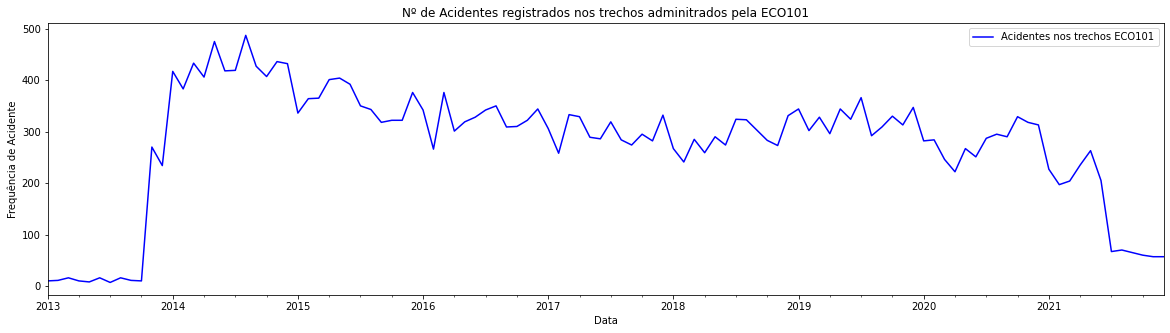

In [ ]:
# Gráfico temporal dos registro de acidentes na rodovia BR-101 ES/BA

print(f"Dos registros enviado para ANTT, o primeiro ingressou em {min(df.data).strftime('%d %B %Y')}, e o mais recente ingressou em {max(df.data).strftime('%d %B %Y')}.\n")

plt.figure(figsize=(20,5))
df.set_index('data').resample('MS').size().plot(label='Acidentes nos trechos ECO101', color='blue')
plt.title('Nº de Acidentes registrados nos trechos adminitrados pela ECO101')
plt.legend()
plt.xlim(min(df.data).strftime('%d %B %Y'),max(df.data).strftime('%d %B %Y')) # Limiting to whole months
plt.xlabel('Data')
plt.ylabel('Frequência de Acidente')
plt.show()

In [ ]:
# Seleção da série com periodo válido - última data de referência foi a data de atualização do DataSet no Site da ANTT

selecao = (df['data'] >= '2013-01-01') & (df['data'] <= '2021-06-30')
df= df[selecao]

Após a exclusão dos registros inconsistentes,  o primeiro registro foi 12 January 2013, e o mais recente ingressou em 30 June 2021.



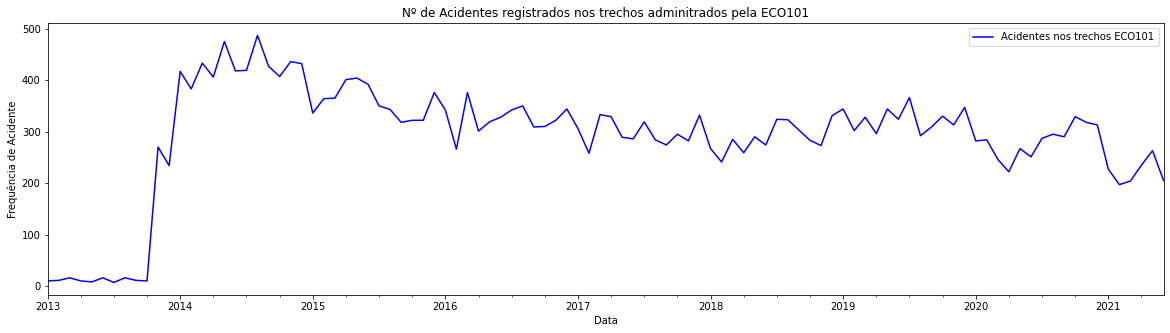

O conjunto de dados contém 29611 registro de acidentes


In [ ]:
# Gráfico temporal dos acidentes

print(f"Após a exclusão dos registros inconsistentes,  o primeiro registro foi {min(df.data).strftime('%d %B %Y')}, e o mais recente ingressou em {max(df.data).strftime('%d %B %Y')}.\n")
plt.figure(figsize=(20,5))
df.set_index('data').resample('MS').size().plot(label='Acidentes nos trechos ECO101', color='blue')
plt.title('Nº de Acidentes registrados nos trechos adminitrados pela ECO101')
plt.legend()
plt.xlim(min(df.data).strftime('%d %B %Y'),max(df.data).strftime('%d %B %Y')) # Limiting to whole months
plt.xlabel('Data')
plt.ylabel('Frequência de Acidente')
plt.show()
print(f"O conjunto de dados contém {len(df)} registro de acidentes")

A função a seguir, tem a finalidade de protar o gráfico com a quantidade de acidentes, trabalhando a decomposição da tendência, sazonalidade e residuos. 

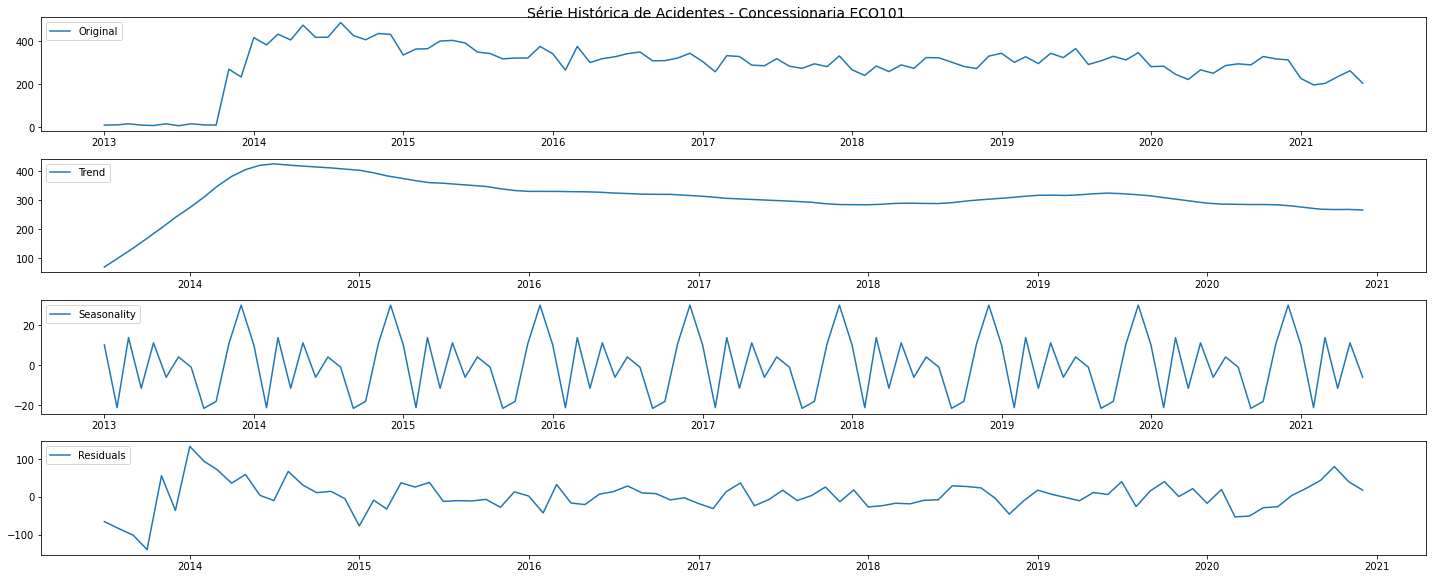

In [ ]:
# Criado DataSet para Series Temporal

ts_df = pd.DataFrame(df.set_index('data').resample('MS').size())

# descrição das variáveis
ts_df= ts_df.rename(columns={0: 'n_acidentes'})
ts_df.index.rename('month', inplace=True)

# Função foi definida para plotar o gráfico da série orginal e a decomposição (Tendência, Sazonalidade e Resíduos)
def decompose_time_series(df, title=''):
    
    # Decomposição da serie temporal
    decomposition = seasonal_decompose(df)
    
    # Obtendo a tendencia, sazonalidade e rúido
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plotando os gráficos
    plt.figure(figsize=(20,8))
    plt.suptitle(title, fontsize=14, y=1)
    plt.subplots_adjust(top=0.80)
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()

decompose_time_series(ts_df, title='Série Histórica de Acidentes - Concessionaria ECO101')

## Variáveis Categóricas x nº de acidentes


### Características do Local

Referente ao trecho, 98% dos acidentes ocorrem ao longo da BR 101. 

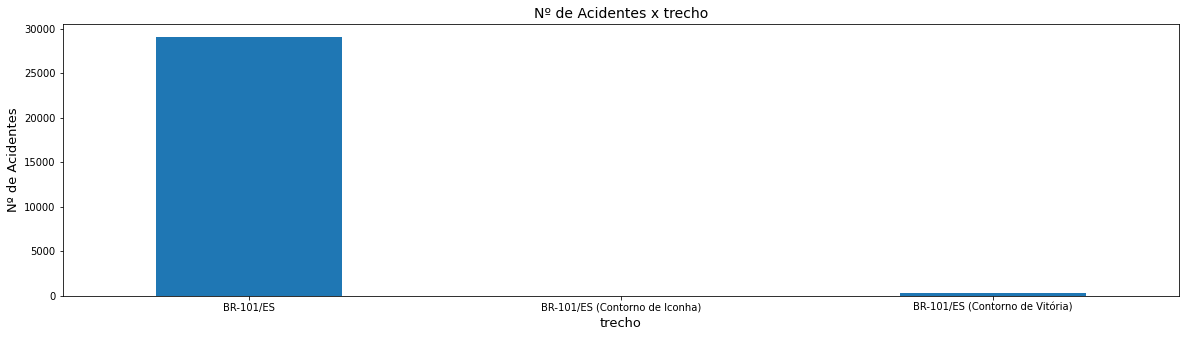

BR-101/ES                          0.981392
BR-101/ES (Contorno de Vitória)    0.009355
BR-101/BA                          0.008814
BR-101/ES (Contorno de Iconha)     0.000439
Name: trecho, dtype: float64


In [ ]:
# Trecho
plt.figure(figsize=(20,5))
df.groupby('trecho').data.count().plot(kind='bar')
plt.title('Nº de Acidentes x trecho', fontsize=14)
plt.xlabel('trecho', fontsize=13)
plt.ylabel('Nº de Acidentes', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()
print(df.trecho.value_counts(normalize=True))

Referente ao trecho, nota-se uma maior frequência no trecho classificado como tr02, com 35,39% dos acidentes. 

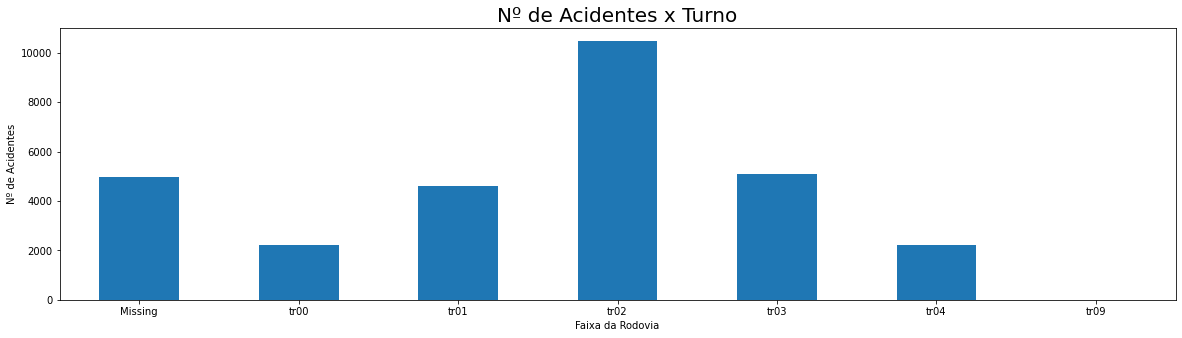

tr02       0.353923
tr03       0.172503
Missing    0.167944
tr01       0.155719
tr00       0.075344
tr04       0.074263
tr09       0.000304
Name: faixa_rodovia, dtype: float64


In [ ]:
# faixa da rodovia (segmentão padronizada)
plt.figure(figsize=(20,5))
df.groupby('faixa_rodovia').data.count().plot(kind='bar')
plt.title('Nº de Acidentes x Turno', fontsize=20)
plt.xlabel('Faixa da Rodovia', fontsize=10)
plt.ylabel('Nº de Acidentes', fontsize=10)
plt.xticks(rotation=0)
#plt.xlim(left=0.5)
plt.show()
print(df.faixa_rodovia.value_counts(normalize=True))

### Características de Tempo


Referente aos acidentes por dia do mês, nota-se que não há um destaque em um determinado dia quanto as eventos de acidentes. 

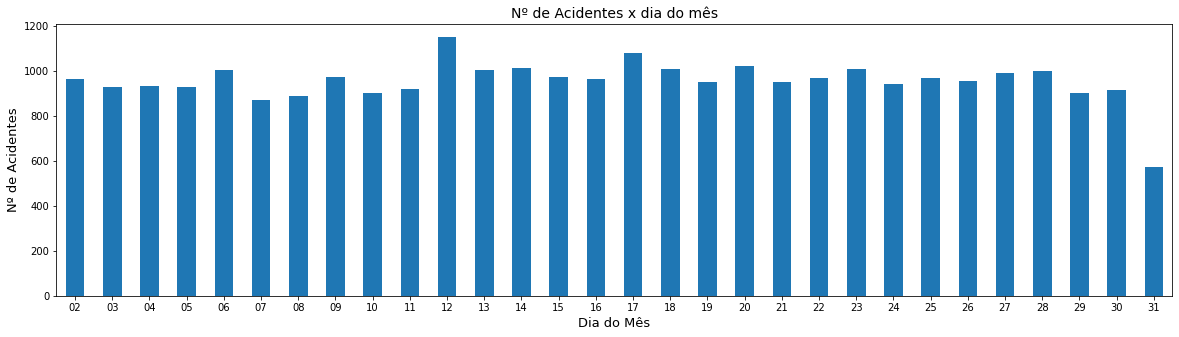

12    0.038837
17    0.036372
20    0.034514
14    0.034109
18    0.034041
23    0.034041
06    0.033940
13    0.033873
28    0.033670
27    0.033467
01    0.033231
09    0.032859
15    0.032758
25    0.032724
22    0.032724
02    0.032555
16    0.032555
26    0.032218
21    0.032049
19    0.032049
24    0.031711
04    0.031542
03    0.031373
05    0.031272
11    0.031070
30    0.030901
29    0.030462
10    0.030428
08    0.029921
07    0.029415
31    0.019317
Name: dia_mes, dtype: float64


In [ ]:
# Dia do mês
plt.figure(figsize=(20,5))
df.groupby('dia_mes').data.count().plot(kind='bar')
plt.title('Nº de Acidentes x dia do mês', fontsize=14)
plt.xlabel('Dia do Mês', fontsize=13)
plt.ylabel('Nº de Acidentes', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()
print(df.dia_mes.value_counts(normalize=True))

O gráfico permite avaliar que há uma tendência de redução dos acidentes, com um leve aumento no ano de 2019. Uma possível justificativa para esse resultado, talves seja as adequações (investimentos) que vem sendo realizadas na rodovia ao longo dos anos. 

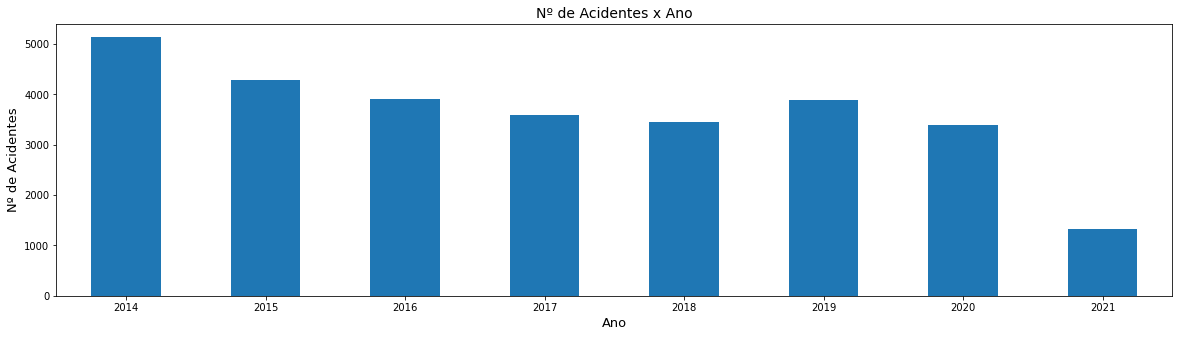

2014    0.173584
2015    0.144980
2016    0.132012
2019    0.131539
2017    0.121137
2018    0.116612
2020    0.114282
2021    0.044950
2013    0.020904
Name: ano, dtype: float64


In [ ]:
# Ano
plt.figure(figsize=(20,5))
df.groupby('ano').data.count().plot(kind='bar')
plt.title('Nº de Acidentes x Ano', fontsize=14)
plt.xlabel('Ano', fontsize=13)
plt.ylabel('Nº de Acidentes', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()
print(df.ano.value_counts(normalize=True))

Referente ao dia da semana, nota-se maior número de acidentes concentrados na sexta e sábado. 

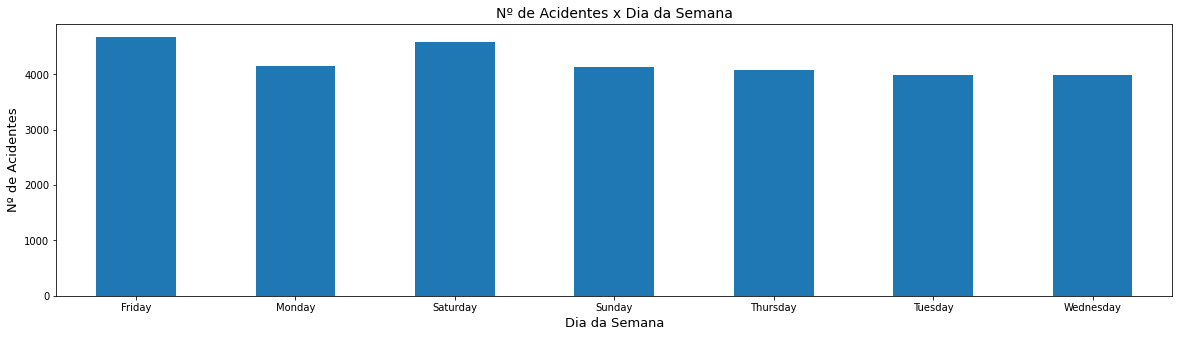

Friday       0.157914
Saturday     0.154976
Monday       0.140252
Sunday       0.139779
Thursday     0.137550
Wednesday    0.134781
Tuesday      0.134747
Name: dia_da_semana, dtype: float64


In [ ]:
# Dia da semana
plt.figure(figsize=(20,5))
df.groupby('dia_da_semana').data.count().plot(kind='bar')
plt.title('Nº de Acidentes x Dia da Semana', fontsize=14)
plt.xlabel('Dia da Semana', fontsize=13)
plt.ylabel('Nº de Acidentes', fontsize=13)
plt.xticks(rotation=0)
#plt.xlim(left=0.5)
plt.show()
print(df.dia_da_semana.value_counts(normalize=True))

No tocante a hora do dia, observa que os horários de picos (pela manhã - 7 horas e a noite - 18 horas) se destacam, com o fim da tarde e inicio da noite com maior concentração também. 

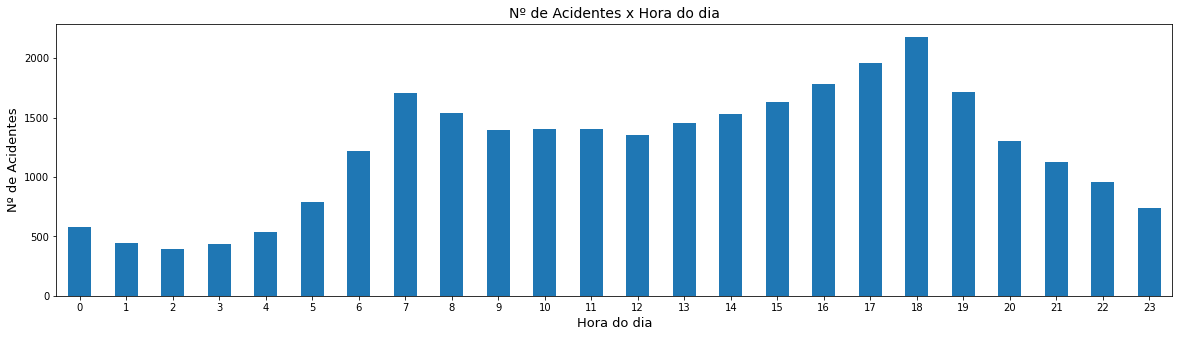

18    0.073588
17    0.066293
16    0.060349
19    0.058053
7     0.057681
15    0.055047
8     0.051974
14    0.051670
13    0.049205
10    0.047482
11    0.047347
9     0.047145
12    0.045794
20    0.044139
6     0.041302
21    0.038161
22    0.032387
5     0.026612
23    0.024856
0     0.019621
4     0.018101
1     0.015096
3     0.014758
2     0.013340
Name: hora, dtype: float64


In [ ]:
# Hora do dia
plt.figure(figsize=(20,5))
df.groupby('hora').data.count().plot(kind='bar')
plt.title('Nº de Acidentes x Hora do dia', fontsize=14)
plt.xlabel('Hora do dia', fontsize=13)
plt.ylabel('Nº de Acidentes', fontsize=13)
plt.xticks(rotation=0)
#plt.xlim(left=0.5)
plt.show()
print(df.hora.value_counts(normalize=True))

Pelo gráfico anterior, era esperado que o período da tarde aonde se destaca quanto ao maior volume de acidentes, sendo seguido pela manhã.

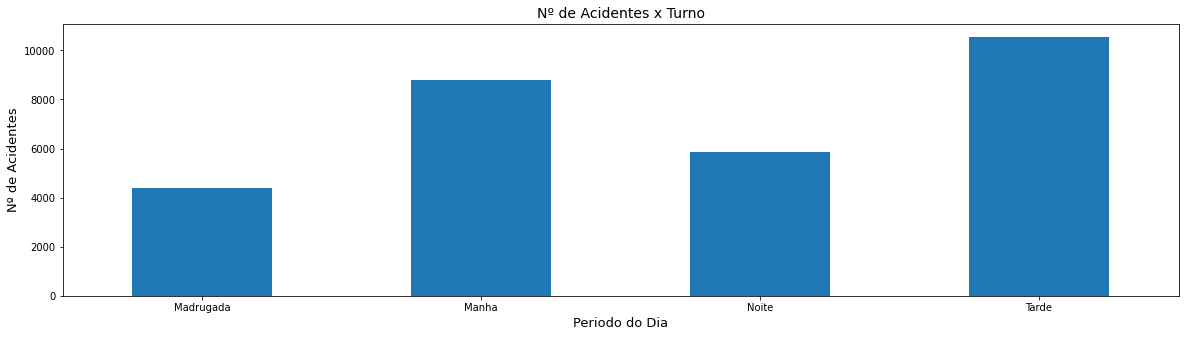

Tarde        0.356151
Manha        0.297423
Noite        0.197595
Madrugada    0.148830
Name: periodo, dtype: float64


In [ ]:
# Periodo do dia
plt.figure(figsize=(20,5))
df.groupby('periodo').data.count().plot(kind='bar')
plt.title('Nº de Acidentes x Turno', fontsize=14)
plt.xlabel('Periodo do Dia', fontsize=13)
plt.ylabel('Nº de Acidentes', fontsize=13)
plt.xticks(rotation=0)
#plt.xlim(left=0)
plt.show()
print(df.periodo.value_counts(normalize=True))

### Características de Acidentes

A variavel Tipo de Acidente foi agrupada 10 tipos de um total de 290 tipos de eventos observado no conjunto de dados. A seguir, nota-se a colisão como destaque referente aos tipos de acidentes, representando mais de 50% dos acidents nos trechos administrado pela ECO101.

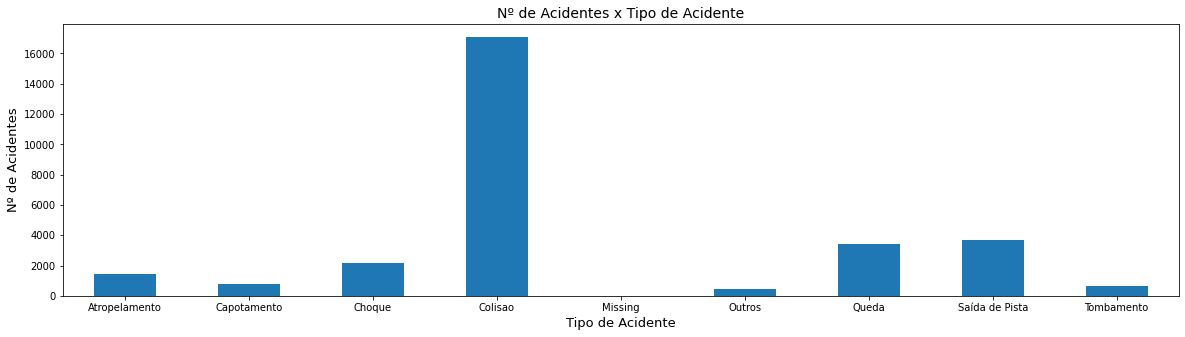

Colisao           0.577252
Saída de Pista    0.123636
Queda             0.115835
Choque            0.072338
Atropelamento     0.047651
Capotamento       0.025295
Tombamento        0.022458
Outros            0.015400
Missing           0.000135
Name: grupo_tdacidente, dtype: float64


In [ ]:
# Tipo de acidente
plt.figure(figsize=(20,5))
df.groupby('grupo_tdacidente').data.count().plot(kind='bar')
plt.title('Nº de Acidentes x Tipo de Acidente', fontsize=14)
plt.xlabel('Tipo de Acidente', fontsize=13)
plt.ylabel('Nº de Acidentes', fontsize=13)
plt.xticks(rotation=0)
#plt.xlim(left=0.5)
plt.show()
print(df.grupo_tdacidente.value_counts(normalize=True))

A variável tipo de ocorrência foi agrupada em dois tipos, com vítimas e sem vítimas. Essa variável, sera empregada no modelo preditivo, como a classificação do tipo de desfecho. Inicialmente, seria utilizada a variável resposta (tipo de ocorrencia), com desfecho com vítima e sem vítima. Ao confrontar essas informações com a variável "n_mortos", é possível rescrever para tornar uma variável com três categorias: 

- sem vítima
- com vítima sem morte
- Fatalidade

Portanto, conforme tabela de dupla entrada abaixo (Tipo_ocorrência x n_mortes), todos os que foi evidenciado pelos uma morte na tabela, serão considerados como "Fatalidade". 

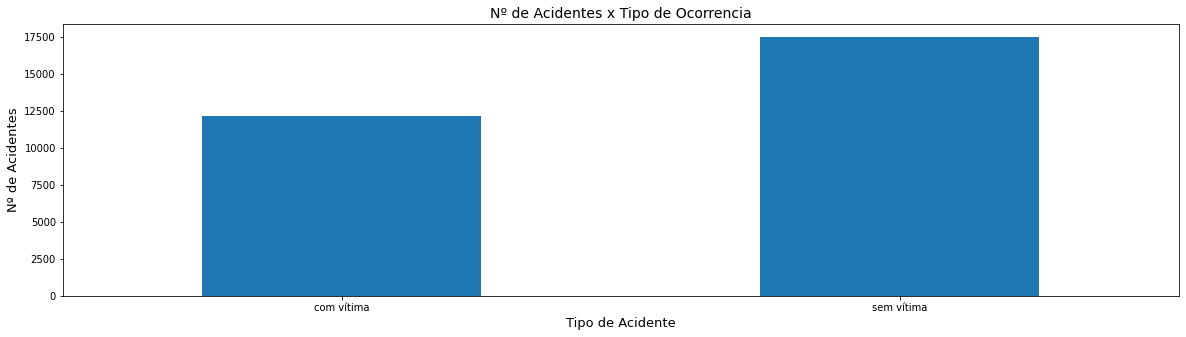

sem vítima    0.590422
com vítima    0.409578
Name: grupo_tdocorrencia, dtype: float64


In [ ]:
# tipo de Ocorrencia
plt.figure(figsize=(20,5))
df.groupby('grupo_tdocorrencia').data.count().plot(kind='bar')
plt.title('Nº de Acidentes x Tipo de Ocorrencia', fontsize=14)
plt.xlabel('Tipo de Acidente', fontsize=13)
plt.ylabel('Nº de Acidentes', fontsize=13)
plt.xticks(rotation=0)
#plt.xlim(left=0.5)
plt.show()
print(df.grupo_tdocorrencia.value_counts(normalize=True))

In [ ]:
# Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos nº de mortos 

tabela1 = pd.crosstab(index=df["grupo_tdocorrencia"],columns=df["n_mortos"],margins=True)   
tabela1.index= ["com vítima","sem vítima","Total"]
tabela1

n_mortos,0.0,1.0,2.0,3.0,4.0,5.0,6.0,8.0,11.0,21.0,All
com vítima,11351,666,75,23,7,1,1,1,2,1,12128
sem vítima,17474,7,1,0,0,0,1,0,0,0,17483
Total,28825,673,76,23,7,1,2,1,2,1,29611


In [ ]:
# Reclassificando a variável tipo ocorrência

def toco(df):
    toco = df['grupo_tdocorrencia']
    if toco == "sem vítima" and df['n_mortos']==0: return 'sem vítima'
    elif toco == "com vítima" and df['n_mortos']==0: return 'Com vítima sem morte'
    return 'Fatalidade'
df['tipo_ocor_target'] = df.apply(toco, axis=1)
df.tipo_ocor_target.value_counts()


sem vítima              17474
Com vítima sem morte    11351
Fatalidade                786
Name: tipo_ocor_target, dtype: int64

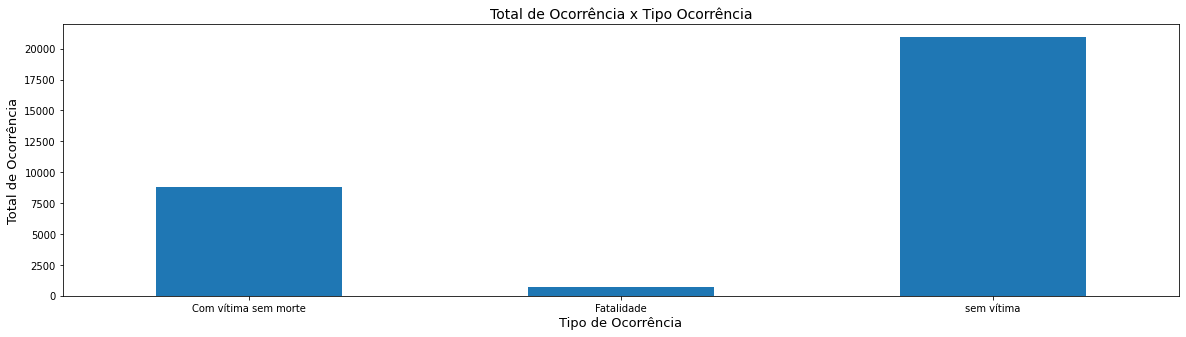

n_mortos,0.0,1.0,2.0,3.0,4.0,5.0,6.0,8.0,11.0,21.0,All
Com vítima sem morte,11351,0,0,0,0,0,0,0,0,0,11351
Fatalidade,0,673,76,23,7,1,2,1,2,1,786
sem vítima,17474,0,0,0,0,0,0,0,0,0,17474
total,28825,673,76,23,7,1,2,1,2,1,29611


In [ ]:
plt.figure(figsize=(20,5))
df.groupby('tipo_ocor_target').n_automovel.sum().plot(kind='bar')
plt.title('Total de Ocorrência x Tipo Ocorrência', fontsize=14)
plt.xlabel('Tipo de Ocorrência', fontsize=13)
plt.ylabel('Total de Ocorrência', fontsize=13)
plt.xticks(rotation=0)
#plt.xlim(left=0.5)
plt.show()

# Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos nº de mortos 

tabela1 = pd.crosstab(index=df["tipo_ocor_target"],columns=df["n_mortos"],margins=True)   
tabela1.index= ["Com vítima sem morte","Fatalidade","sem vítima","total"]
tabela1

## Variáveis núméricas x tipo de ocorrência

```
# Isto está formatado como código
```



Para as variáveis categóricas, inicialmente, foram plotados aos gráficos e tabelas de frequência para entender a distribuição dessas em função do tipo de desfecho (com vítima, com vítima sem mortes e Fatalidade). Com excessão da variável "n_ilesos", que envolve um maior número de eventos de pessoas envolvidas, todos os demais, a frequência dos eventos ficou concentrada, no máximo, com 5 eventos. Referente aos veículos, todas as variáveis serão transformadas em binária (1 se teve o evento e 0 caso contrário).

### Tipo de Veículos

##################################################################################################################################################
################################### Analise da variável númerica -  n_automovel ####################################################################
##################################################################################################################################################

Histograma da variável  n_automovel 



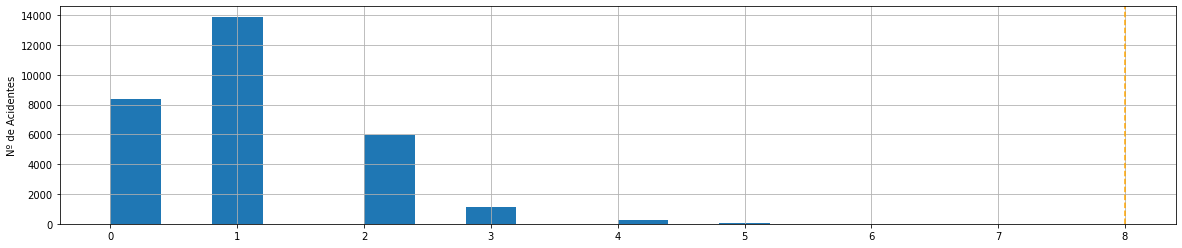

Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_automovel 

n_automovel            0.0    1.0   2.0   3.0  4.0  5.0  6.0  7.0    All
Com vítima sem morte  4685   4937  1406   239   60   19    4    1  11351
Fatalidade             288    363   108    20    4    1    1    1    786
sem vítima            3379   8598  4430   842  175   43    4    3  17474
total                 8352  13898  5944  1101  239   63    9    5  29611


Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_automovel (Percentual por linha)

tabela dupla Entrada total por linha 

n_automovel                0.0       1.0       2.0       3.0       4.0  \
Com vítima sem morte  0.412739  0.434940  0.123866  0.021055  0.005286   
Fatalidade            0.366412  0.461832  0.137405  0.025445  0.005089   
sem vítima            0.193373  0.492045  0.253520  0.048186  0.010015   
total                 0.282057  0.469353  0.200736  0.037182  0.008071   

n_automovel                5.0       6.0       7.0 

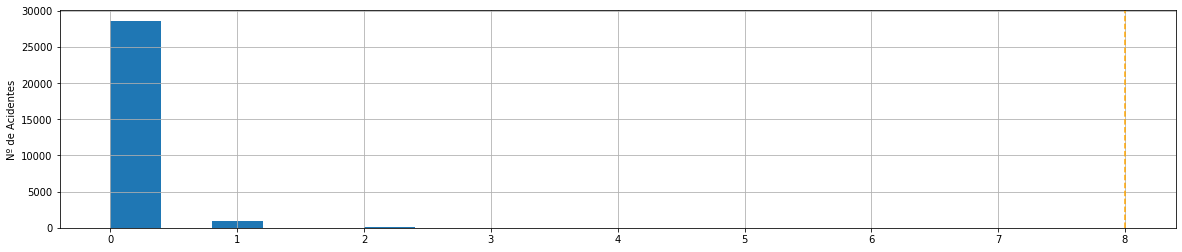

Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_bicicleta 

n_bicicleta             0.0  1.0  2.0    All
Com vítima sem morte  10655  670   26  11351
Fatalidade              735   50    1    786
sem vítima            17215  242   17  17474
total                 28605  962   44  29611


Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_bicicleta (Percentual por linha)

tabela dupla Entrada total por linha 

n_bicicleta                0.0       1.0       2.0  All
Com vítima sem morte  0.938684  0.059026  0.002291  1.0
Fatalidade            0.935115  0.063613  0.001272  1.0
sem vítima            0.985178  0.013849  0.000973  1.0
total                 0.966026  0.032488  0.001486  1.0
##################################################################################################################################################
################################### Analise da variável númerica -  n_caminha #########################################################

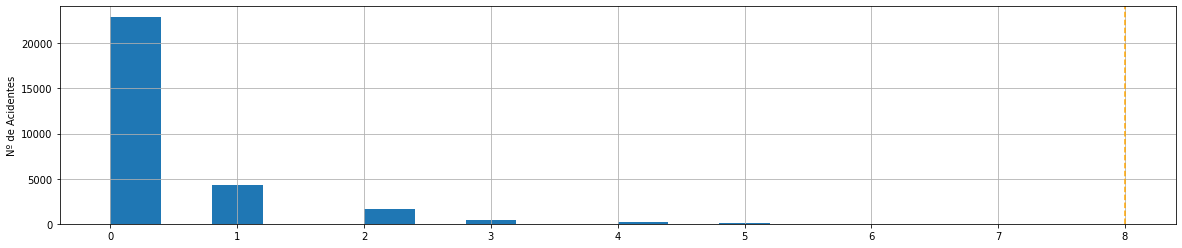

Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_caminha 

n_caminha               0.0   1.0   2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  \
Com vítima sem morte   9496  1236   438  106   55   10    6    2    0    1   
Fatalidade              475   198    78   17   10    7    1    0    0    0   
sem vítima            12986  2849  1138  304  131   35   21    4    5    0   
total                 22957  4283  1654  427  196   52   28    6    5    1   

n_caminha             10.0    All  
Com vítima sem morte     1  11351  
Fatalidade               0    786  
sem vítima               1  17474  
total                    2  29611  


Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_caminha (Percentual por linha)

tabela dupla Entrada total por linha 

n_caminha                  0.0       1.0       2.0       3.0       4.0  \
Com vítima sem morte  0.836578  0.108889  0.038587  0.009338  0.004845   
Fatalidade            0.604326  0.251908  0.099237  0.021628  0.012723  

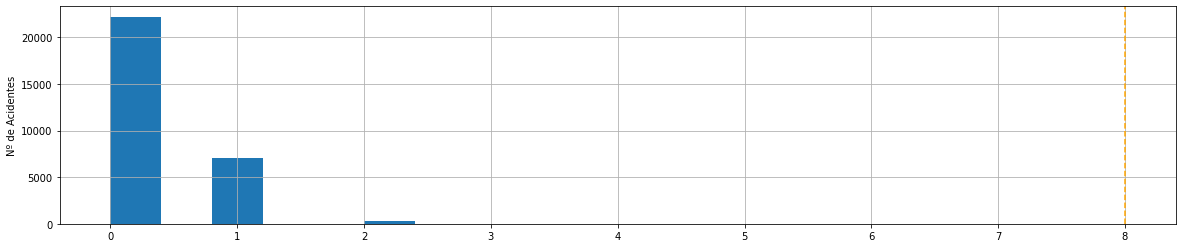

Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_motos 

n_motos                 0.0   1.0  2.0  3.0  4.0  5.0    All
Com vítima sem morte   5727  5343  270    8    2    1  11351
Fatalidade              565   202   17    2    0    0    786
sem vítima            15909  1498   62    2    3    0  17474
total                 22201  7043  349   12    5    1  29611


Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_motos (Percentual por linha)

tabela dupla Entrada total por linha 

n_motos                    0.0       1.0       2.0       3.0       4.0  \
Com vítima sem morte  0.504537  0.470707  0.023786  0.000705  0.000176   
Fatalidade            0.718830  0.256997  0.021628  0.002545  0.000000   
sem vítima            0.910438  0.085727  0.003548  0.000114  0.000172   
total                 0.749755  0.237851  0.011786  0.000405  0.000169   

n_motos                    5.0  All  
Com vítima sem morte  0.000088  1.0  
Fatalidade            0.000000  1.0  
sem v

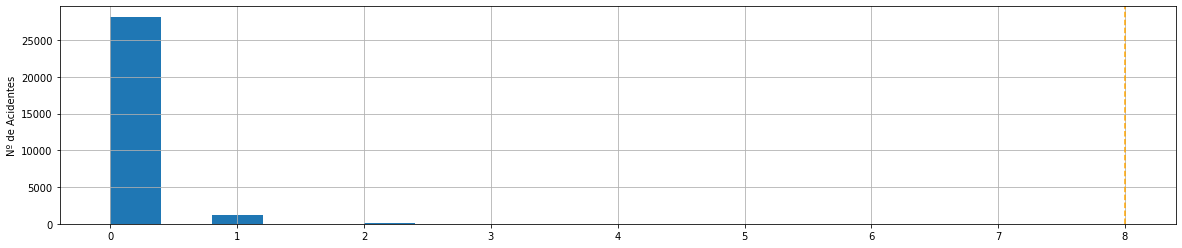

Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_onibus 

n_onibus                0.0   1.0  2.0  3.0  4.0  5.0  6.0    All
Com vítima sem morte  10729   572   37   11    2    0    0  11351
Fatalidade              722    60    3    1    0    0    0    786
sem vítima            16744   633   69   17    7    3    1  17474
total                 28195  1265  109   29    9    3    1  29611


Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_onibus (Percentual por linha)

tabela dupla Entrada total por linha 

n_onibus                   0.0       1.0       2.0       3.0       4.0  \
Com vítima sem morte  0.945203  0.050392  0.003260  0.000969  0.000176   
Fatalidade            0.918575  0.076336  0.003817  0.001272  0.000000   
sem vítima            0.958224  0.036225  0.003949  0.000973  0.000401   
total                 0.952180  0.042721  0.003681  0.000979  0.000304   

n_onibus                   5.0       6.0  All  
Com vítima sem morte  0.000000  0.000000  1.

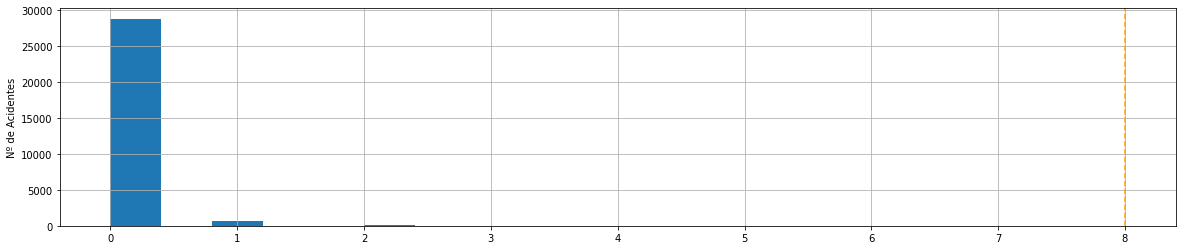

Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_outros 

n_outros                0.0  1.0  2.0  3.0  4.0  5.0  7.0    All
Com vítima sem morte  11074  251   23    2    1    0    0  11351
Fatalidade              754   29    3    0    0    0    0    786
sem vítima            17018  386   55   12    1    1    1  17474
total                 28846  666   81   14    2    1    1  29611


Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_outros (Percentual por linha)

tabela dupla Entrada total por linha 

n_outros                   0.0       1.0       2.0       3.0       4.0  \
Com vítima sem morte  0.975597  0.022113  0.002026  0.000176  0.000088   
Fatalidade            0.959288  0.036896  0.003817  0.000000  0.000000   
sem vítima            0.973904  0.022090  0.003148  0.000687  0.000057   
total                 0.974165  0.022492  0.002735  0.000473  0.000068   

n_outros                   5.0       7.0  All  
Com vítima sem morte  0.000000  0.000000  1.0  
F

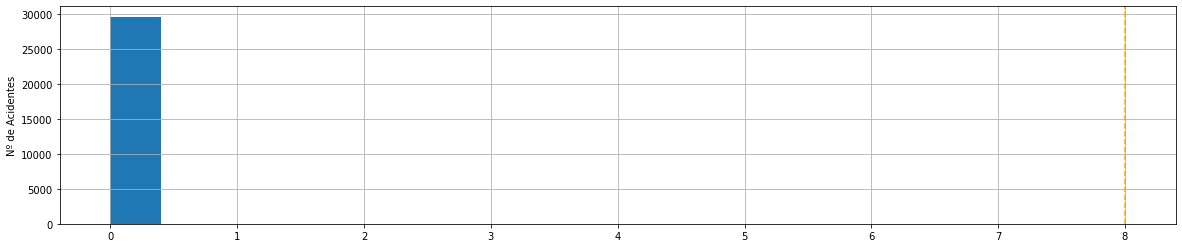

Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_tracaoanimal 

n_tracaoanimal          0.0  1.0    All
Com vítima sem morte  11335   16  11351
Fatalidade              784    2    786
sem vítima            17464   10  17474
total                 29583   28  29611


Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_tracaoanimal (Percentual por linha)

tabela dupla Entrada total por linha 

n_tracaoanimal             0.0       1.0  All
Com vítima sem morte  0.998590  0.001410  1.0
Fatalidade            0.997455  0.002545  1.0
sem vítima            0.999428  0.000572  1.0
total                 0.999054  0.000946  1.0
##################################################################################################################################################
################################### Analise da variável númerica -  n_tracaoanimal ####################################################################
####################################################

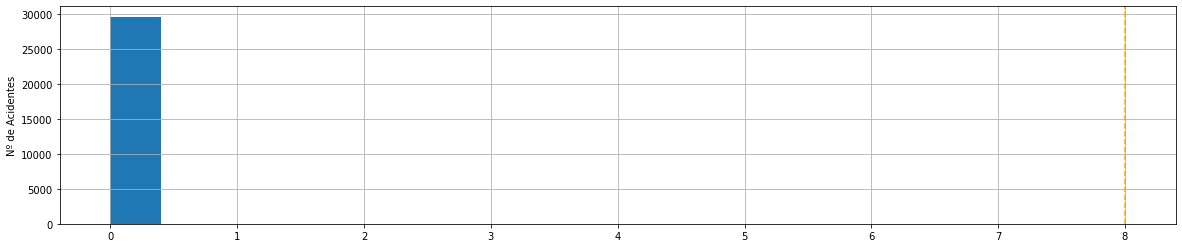

Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_tracaoanimal 

n_tracaoanimal          0.0  1.0    All
Com vítima sem morte  11335   16  11351
Fatalidade              784    2    786
sem vítima            17464   10  17474
total                 29583   28  29611


Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_tracaoanimal (Percentual por linha)

tabela dupla Entrada total por linha 

n_tracaoanimal             0.0       1.0  All
Com vítima sem morte  0.998590  0.001410  1.0
Fatalidade            0.997455  0.002545  1.0
sem vítima            0.999428  0.000572  1.0
total                 0.999054  0.000946  1.0
##################################################################################################################################################
################################### Analise da variável númerica -  n_trans_cargas_esp ####################################################################
################################################

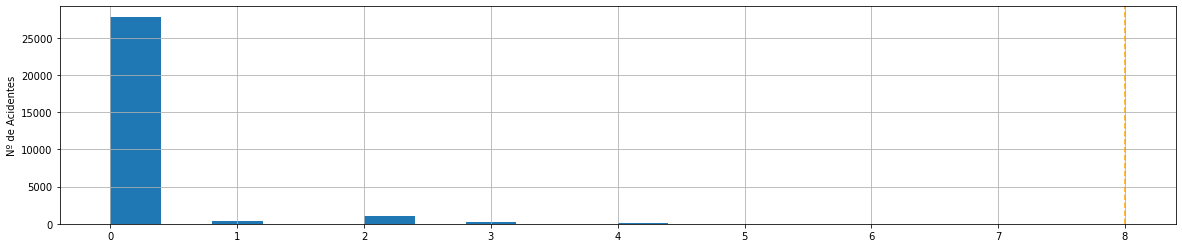

Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_trans_cargas_esp 

n_trans_cargas_esp      0.0  1.0   2.0  3.0  4.0  5.0  6.0  7.0  8.0    All
Com vítima sem morte  10882   80   286   75   16    7    3    1    1  11351
Fatalidade              706   13    46   15    5    0    1    0    0    786
sem vítima            16278  288   670  161   59   15    1    2    0  17474
total                 27866  381  1002  251   80   22    5    3    1  29611


Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_trans_cargas_esp (Percentual por linha)

tabela dupla Entrada total por linha 

n_trans_cargas_esp         0.0       1.0       2.0       3.0       4.0  \
Com vítima sem morte  0.958682  0.007048  0.025196  0.006607  0.001410   
Fatalidade            0.898219  0.016539  0.058524  0.019084  0.006361   
sem vítima            0.931555  0.016482  0.038343  0.009214  0.003376   
total                 0.941069  0.012867  0.033839  0.008477  0.002702   

n_trans_cargas_esp    

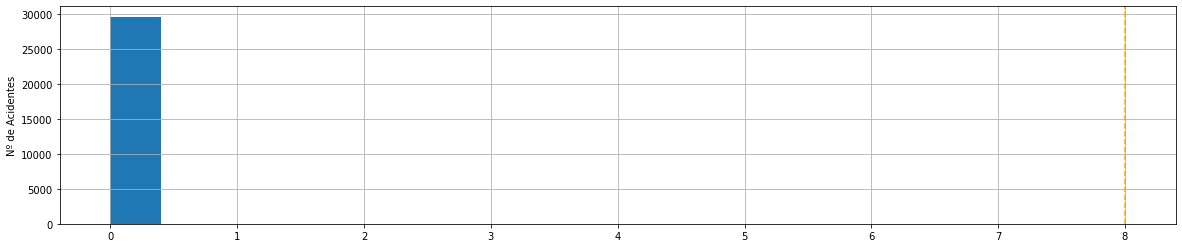

Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_trator_maquinas 

n_trator_maquinas       0.0    All
Com vítima sem morte  11351  11351
Fatalidade              786    786
sem vítima            17474  17474
total                 29611  29611


Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_trator_maquinas (Percentual por linha)

tabela dupla Entrada total por linha 

n_trator_maquinas     0.0  All
Com vítima sem morte  1.0  1.0
Fatalidade            1.0  1.0
sem vítima            1.0  1.0
total                 1.0  1.0
##################################################################################################################################################
################################### Analise da variável númerica -  n_utilitarios ####################################################################
##################################################################################################################################################


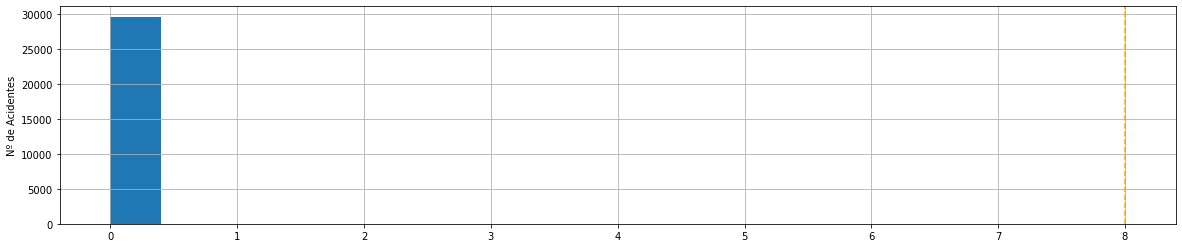

Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_utilitarios 

n_utilitarios           0.0    All
Com vítima sem morte  11351  11351
Fatalidade              786    786
sem vítima            17474  17474
total                 29611  29611


Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_utilitarios (Percentual por linha)

tabela dupla Entrada total por linha 

n_utilitarios         0.0  All
Com vítima sem morte  1.0  1.0
Fatalidade            1.0  1.0
sem vítima            1.0  1.0
total                 1.0  1.0


In [ ]:
# Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos nº de bicicletas
var_num = ["n_automovel","n_bicicleta","n_caminha","n_motos","n_onibus","n_outros","n_tracaoanimal","n_tracaoanimal","n_trans_cargas_esp","n_trator_maquinas","n_utilitarios"]
for a in var_num: 
  print("##################################################################################################################################################")
  print("################################### Analise da variável númerica - ", a,"####################################################################")
  print("##################################################################################################################################################\n")
  plt.figure(figsize=(20,4))
  print("Histograma da variável ", a,"\n")
  df[a].hist(bins=20, range=(0,8))
  plt.axvline(8, color='orange', linestyle='--')
  plt.ylabel("Nº de Acidentes")
  plt.show()
  
  print("Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos", a,"\n")
  tabela1 = pd.crosstab(index=df["tipo_ocor_target"],columns=df[a],margins=True)   
  tabela1.index=["Com vítima sem morte","Fatalidade","sem vítima","total"]
  tabela1
  tab = pd.crosstab(index=df["tipo_ocor_target"],columns=df[a],margins=True)   
  tab.index= ["Com vítima sem morte","Fatalidade","sem vítima","total"]
  print(tab)
  print("\n")
  
  
  print("Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos", a,"(Percentual por linha)\n")
  print("tabela dupla Entrada total por linha \n")
  print(tab.div(tab["All"], axis=0))


### Gravidade do Acidentes 

##################################################################################################################################################
################################### Analise da variável númerica -  n_ilesos_acidente ####################################################################
##################################################################################################################################################

Histograma da variável  n_ilesos_acidente 



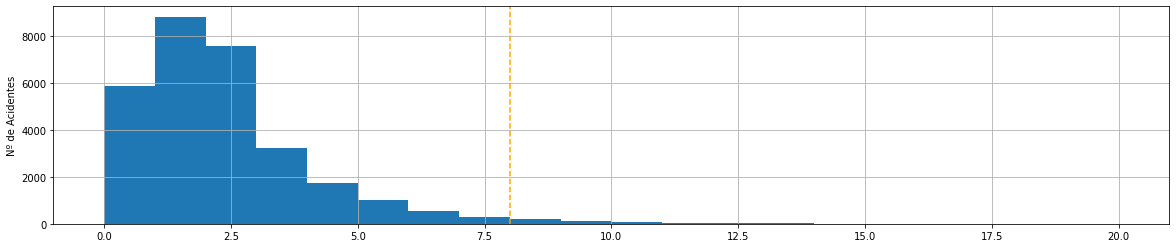

Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_ilesos_acidente 

n_ilesos_acidente      0.0   1.0   2.0   3.0   4.0   5.0  6.0  7.0  8.0  9.0  \
Com vítima sem morte  4944  3594  1411   664   343   192   71   45   28   13   
Fatalidade             308   295    83    41    23     9    4    5    0    1   
sem vítima             604  4919  6071  2537  1355   817  488  258  167   84   
total                 5856  8808  7565  3242  1721  1018  563  308  195   98   

n_ilesos_acidente     10.0  11.0  12.0  ...  27.0  28.0  30.0  31.0  32.0  \
Com vítima sem morte    11     9     5  ...     1     2     0     2     0   
Fatalidade               0     2     0  ...     0     1     0     0     1   
sem vítima              52    25    28  ...     3     1     1     0     1   
total                   63    36    33  ...     4     4     1     2     2   

n_ilesos_acidente     34.0  35.0  36.0  37.0  40.0  47.0  48.0    All  
Com vítima sem morte     0     1     0     0     1     0    

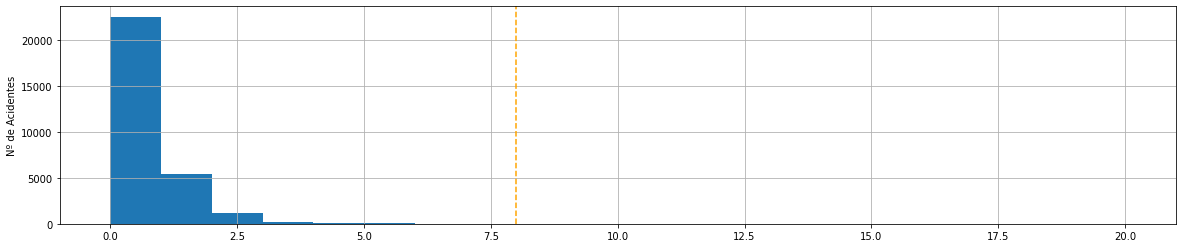

Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_lev_feridos 

n_lev_feridos           0.0   1.0   2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  \
Com vítima sem morte   4719  5120  1143  232   80   33   12    3    1    1   
Fatalidade              635    95    32   11    3    2    0    2    0    2   
sem vítima            17233   211    26    4    0    0    0    0    0    0   
total                 22587  5426  1201  247   83   35   12    5    1    3   

n_lev_feridos         11.0  12.0  13.0  15.0  16.0  28.0  36.0  45.0    All  
Com vítima sem morte     1     1     0     1     1     1     1     1  11351  
Fatalidade               0     1     1     0     2     0     0     0    786  
sem vítima               0     0     0     0     0     0     0     0  17474  
total                    1     2     1     1     3     1     1     1  29611  


Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_lev_feridos (Percentual por linha)

tabela dupla Entrada total por linha 

n_

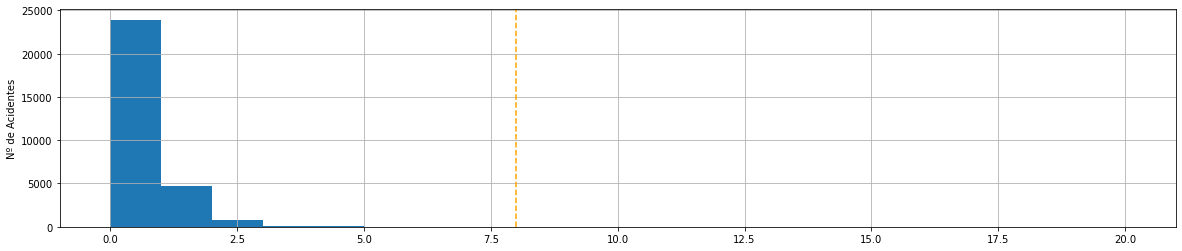

Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_mod_feridos 

n_mod_feridos           0.0   1.0  2.0  3.0  4.0  5.0  6.0  10.0  11.0  12.0  \
Com vítima sem morte   6214  4235  737  105   42    9    7     0     0     1   
Fatalidade              604   115   34   16    8    4    3     1     1     0   
sem vítima            17084   340   46    4    0    0    0     0     0     0   
total                 23902  4690  817  125   50   13   10     1     1     1   

n_mod_feridos         13.0    All  
Com vítima sem morte     1  11351  
Fatalidade               0    786  
sem vítima               0  17474  
total                    1  29611  


Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_mod_feridos (Percentual por linha)

tabela dupla Entrada total por linha 

n_mod_feridos              0.0       1.0       2.0       3.0       4.0  \
Com vítima sem morte  0.547441  0.373095  0.064928  0.009250  0.003700   
Fatalidade            0.768448  0.146310  0.043257  0.

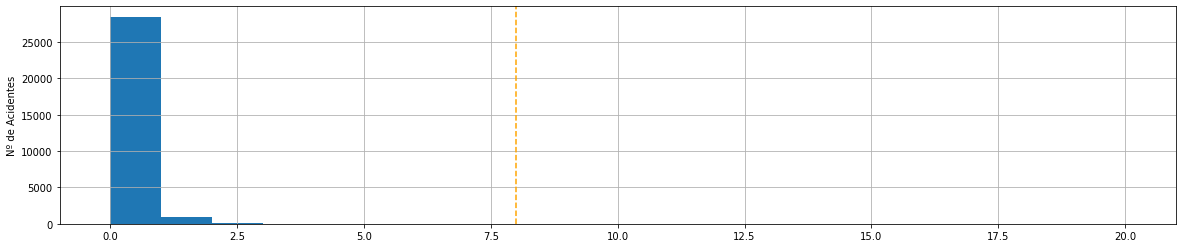

Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_grav_feridos 

n_grav_feridos          0.0  1.0  2.0  3.0  4.0  5.0  12.0  17.0  27.0    All
Com vítima sem morte  10529  733   75    6    7    1     0     0     0  11351
Fatalidade              647   98   26    8    2    2     1     1     1    786
sem vítima            17315  154    5    0    0    0     0     0     0  17474
total                 28491  985  106   14    9    3     1     1     1  29611


Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos n_grav_feridos (Percentual por linha)

tabela dupla Entrada total por linha 

n_grav_feridos             0.0       1.0       2.0       3.0       4.0  \
Com vítima sem morte  0.927583  0.064576  0.006607  0.000529  0.000617   
Fatalidade            0.823155  0.124682  0.033079  0.010178  0.002545   
sem vítima            0.990901  0.008813  0.000286  0.000000  0.000000   
total                 0.962176  0.033265  0.003580  0.000473  0.000304   

n_grav_feridos      

In [ ]:
# Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos nº de bicicletas
var_num = ["n_ilesos_acidente","n_lev_feridos","n_mod_feridos","n_grav_feridos"]
for a in var_num: 
  print("##################################################################################################################################################")
  print("################################### Analise da variável númerica - ", a,"####################################################################")
  print("##################################################################################################################################################\n")
  plt.figure(figsize=(20,4))
  print("Histograma da variável ", a,"\n")
  df[a].hist(bins=20, range=(0,20))
  plt.axvline(8, color='orange', linestyle='--')
  plt.ylabel("Nº de Acidentes")
  plt.show()
  
  print("Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos", a,"\n")
  tabela1 = pd.crosstab(index=df["tipo_ocor_target"],columns=df[a],margins=True)   
  tabela1.index=["Com vítima sem morte","Fatalidade","sem vítima","total"]
  tabela1
  tab = pd.crosstab(index=df["tipo_ocor_target"],columns=df[a],margins=True)   
  tab.index= ["Com vítima sem morte","Fatalidade","sem vítima","total"]
  print(tab)
  print("\n")
  
  
  print("Tabela de Dupla Entrada - Variável Tipo de Ocorrência versos", a,"(Percentual por linha)\n")
  print("tabela dupla Entrada total por linha \n")
  print(tab.div(tab["All"], axis=0))


# Preparação dos dados para modelo preditivo

**Estratégia de Análise**

No que diz respeito ao modelo preditivo e as informações inferências a serem extraídas, decidiu-se pela elaboração de um modelo de classificação com propósito de identificar quais fatores de tempo, tipo de veículo e tipo de acidentes impactam mais a probabilidade do acidentes obter um desfecho com vítima (ferido ou morte). A lógica, ao propor esse modelo, visou atender a necessidade dos gestores em entender a relação entre a acorrência com vítima e esses fatores, permitindo criar estratégias de atuação futuras. 

In [ ]:
tdf=df
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29611 entries, 516545 to 533081
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   concessionaria      29611 non-null  object        
 1   trecho              29611 non-null  object        
 2   data                29611 non-null  datetime64[ns]
 3   hora                29611 non-null  int64         
 4   dia_da_semana       29611 non-null  object        
 5   dia_mes             29611 non-null  object        
 6   mes                 29611 non-null  object        
 7   ano                 29611 non-null  int64         
 8   periodo             29611 non-null  object        
 9   faixa_rodovia       29611 non-null  object        
 10  grupo_tdacidente    29611 non-null  object        
 11  grupo_tdocorrencia  29611 non-null  object        
 12  n_automovel         29611 non-null  float64       
 13  n_bicicleta         29611 non-null  floa

### Tornando as variáveis categoricas binárias

In [ ]:
tdf.drop(['data',
          'grupo_tdocorrencia',
         'concessionaria',
         'faixa_rodovia',
         'dia_mes',
         'ano',
         'n_tracaoanimal',
         'n_trator_maquinas',
         'n_utilitarios',
        'n_outros',
        'n_ilesos_acidente',
        'n_lev_feridos',
        'n_mod_feridos',
        'n_grav_feridos',
        'n_grav_feridos',
        'n_mortos'], axis=1, inplace=True)

In [ ]:
# tornanndo as variáveis categoricas binarias
col = ['trecho',"hora","dia_da_semana","mes","periodo","grupo_tdacidente"]
for a in col:
  tdf = pd.get_dummies(tdf, columns=[a], prefix=[a])

In [ ]:
# tornanndo quantitativa tipo de veiculos em binarias
colv = ['n_automovel',"n_bicicleta","n_caminha","n_motos","n_onibus","n_trans_cargas_esp"]
for a in colv:
  tdf.loc[tdf[a]> 0, a] = 1

In [ ]:
print(f"O conjunto de dados contém {len(tdf)} registro de acidentes")
pd.set_option('display.max_columns', len(tdf.columns)) # para visualizar todas as colunas
pd.set_option('display.max_rows', 100)
tdf.head(5)

O conjunto de dados contém 29611 registro de acidentes


,n_automovel,n_bicicleta,n_caminha,n_motos,n_onibus,n_trans_cargas_esp,tipo_ocor_target,trecho_BR-101/BA,trecho_BR-101/ES,trecho_BR-101/ES (Contorno de Iconha),trecho_BR-101/ES (Contorno de Vitória),hora_0,hora_1,hora_2,hora_3,hora_4,hora_5,hora_6,hora_7,hora_8,hora_9,hora_10,hora_11,hora_12,hora_13,hora_14,hora_15,hora_16,hora_17,hora_18,hora_19,hora_20,hora_21,hora_22,hora_23,dia_da_semana_Friday,dia_da_semana_Monday,dia_da_semana_Saturday,dia_da_semana_Sunday,dia_da_semana_Thursday,dia_da_semana_Tuesday,dia_da_semana_Wednesday,mes_April,mes_August,mes_December,mes_February,mes_January,mes_July,mes_June,mes_March,mes_May,mes_November,mes_October,mes_September,periodo_Madrugada,periodo_Manha,periodo_Noite,periodo_Tarde,grupo_tdacidente_Atropelamento,grupo_tdacidente_Capotamento,grupo_tdacidente_Choque,grupo_tdacidente_Colisao,grupo_tdacidente_Missing,grupo_tdacidente_Outros,grupo_tdacidente_Queda,grupo_tdacidente_Saída de Pista,grupo_tdacidente_Tombamento
id_acidentes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
516545,1.0,0.0,0.0,0.0,0.0,0.0,sem vítima,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
516552,0.0,0.0,0.0,0.0,0.0,0.0,sem vítima,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
516553,1.0,0.0,1.0,0.0,0.0,0.0,sem vítima,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
516303,1.0,0.0,0.0,0.0,0.0,0.0,sem vítima,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
516366,1.0,0.0,0.0,1.0,0.0,0.0,sem vítima,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Reclassificando a variável tipo ocorrência
def t(tdf):
    toco = tdf['tipo_ocor_target']
    if toco == "Fatalidade" : return 1
    elif toco == "Com vítima sem morte" : return 1
    return 0
tdf['target'] = tdf.apply(t, axis=1)
print(tdf.target.value_counts())
tdf.drop(['tipo_ocor_target'], axis=1, inplace=True)

0    17474
1    12137
Name: target, dtype: int64


### Seleção das Variáveis (Mutual information)

Definido as variáveis a serem consideradas no modelo e realizado as transformações necessárias. Nsete etapa, se fez o uso do conceito "mutual_info_classif" com propósito de identificar potenciais variáveis explicativas importante para explicar a probabilidade do acidentes ter um desfecho com vítima (ferida ou morta). 

Mais detalhes acesse o link: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html.


In [ ]:
# Dividindo o dataframe (tdf) entre variáveis explicativas (X) e de resposta (Y)
X = tdf.drop('target', axis=1)
y = tdf.target

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [ ]:
# Separando o conjunto de dados treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# definindo o modelo de seleção. 
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([0.02695396, 0.00767742, 0.00640923, 0.09918955, 0.        ,
       0.        , 0.0002899 , 0.00371697, 0.        , 0.00213956,
       0.        , 0.        , 0.        , 0.00221436, 0.        ,
       0.00341028, 0.00324541, 0.00032904, 0.00415961, 0.        ,
       0.00390702, 0.00465595, 0.00074295, 0.        , 0.00320354,
       0.00465526, 0.        , 0.00314467, 0.        , 0.        ,
       0.00160124, 0.00154828, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00031144, 0.        ,
       0.        , 0.        , 0.        , 0.00158503, 0.00305462,
       0.00052916, 0.        , 0.        , 0.00184203, 0.        ,
       0.00131855, 0.        , 0.        , 0.        , 0.        ,
       0.00194238, 0.00036269, 0.00411989, 0.        , 0.00674971,
       0.00139959, 0.        , 0.00081118, 0.04424944, 0.00653876,
       0.        ])

In [ ]:
# Ranking da variáveis explicativas
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

n_motos                                   0.099190
grupo_tdacidente_Queda                    0.044249
n_automovel                               0.026954
n_bicicleta                               0.007677
grupo_tdacidente_Choque                   0.006750
grupo_tdacidente_Saída de Pista           0.006539
n_caminha                                 0.006409
hora_11                                   0.004656
hora_15                                   0.004655
hora_8                                    0.004160
grupo_tdacidente_Atropelamento            0.004120
hora_10                                   0.003907
trecho_BR-101/ES                          0.003717
hora_5                                    0.003410
hora_6                                    0.003245
hora_14                                   0.003204
hora_17                                   0.003145
mes_February                              0.003055
hora_3                                    0.002214
trecho_BR-101/ES (Contorno de V

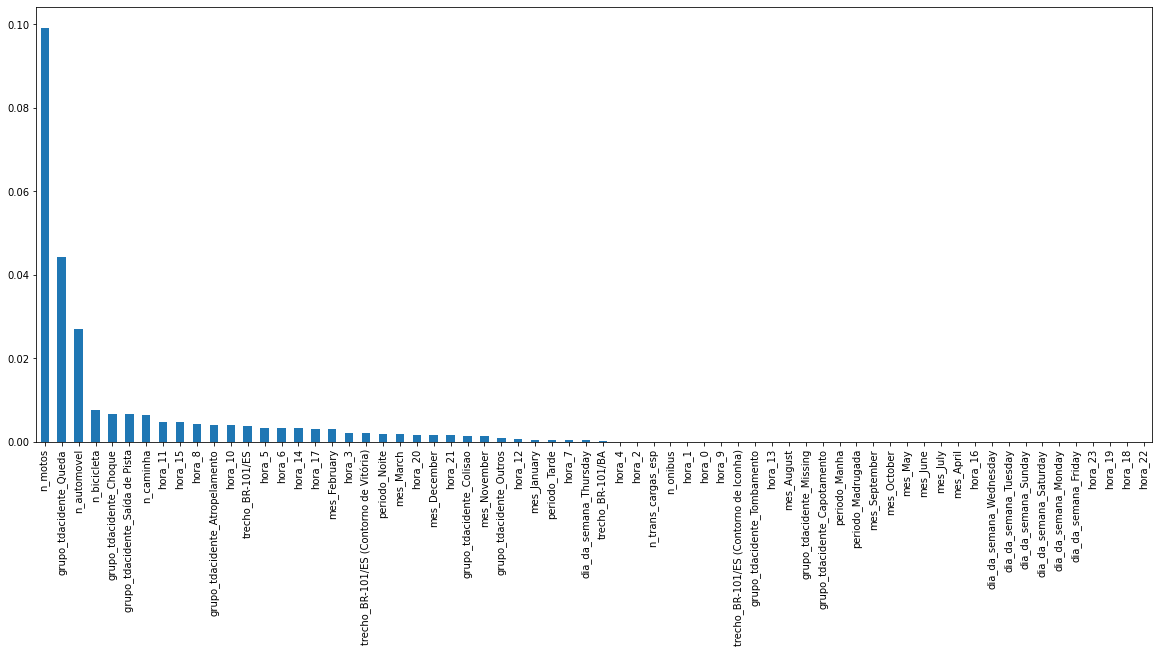

In [ ]:
# Ranking da variáveis explicativas por gráfico
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
# Selecionando 30% das 66 variáveis do dataframe do modelo (tdf) conforme o ranking
sel_ = SelectPercentile(mutual_info_regression, percentile=30).fit(X_train.fillna(0), y_train)
df_var_mod = X_train.columns[sel_.get_support()]

In [ ]:
# Listando 30% as variáveis importantes
df_var_mod

Index(['n_automovel', 'n_caminha', 'n_motos', 'hora_4', 'hora_7', 'hora_14',
       'hora_16', 'hora_18', 'hora_23', 'dia_da_semana_Friday',
       'dia_da_semana_Saturday', 'dia_da_semana_Wednesday', 'mes_February',
       'mes_January', 'mes_September', 'periodo_Madrugada',
       'grupo_tdacidente_Atropelamento', 'grupo_tdacidente_Choque',
       'grupo_tdacidente_Outros', 'grupo_tdacidente_Queda'],
      dtype='object')

In [ ]:
# Gerando um novo conjunto de dados com as variáveis consideradas importantes pelo método MI
colunas = list(df_var_mod)
colunas.append('target')
tdfmod = tdf[colunas]

### Matriz de Correlação 

No primeiro momento, foi utilizado o método MI, o qual identifica as variáveis relevantes para modelo preditivo. No código abaixo é plotado um gráfico com correlações entre as variáveis. 

Ao analisar a matriz de correlação, destacou-se com maiores coeficientes de correlação com a variável resposta (Target - 1 se o acidente foi com vítima e 0 caso contrário). 

**Correlação positiva**

- acidente com motos - 0,45 (quando o acidente é ocasionado por motos, aumenta a probiliade de ter vítimas fatais ou não) 
- tipo de acidente for queda - 0,31 (quando o acidente é ocasionado por queda, tambem aumenta probailidade de ter vítimas fatais ou não)

**Correlação negativa**

- acidentes com automóvel - -0,24 (quando a acidente é ocasionado por automovel, a chance de ter vítimas fatais ou não é menor).



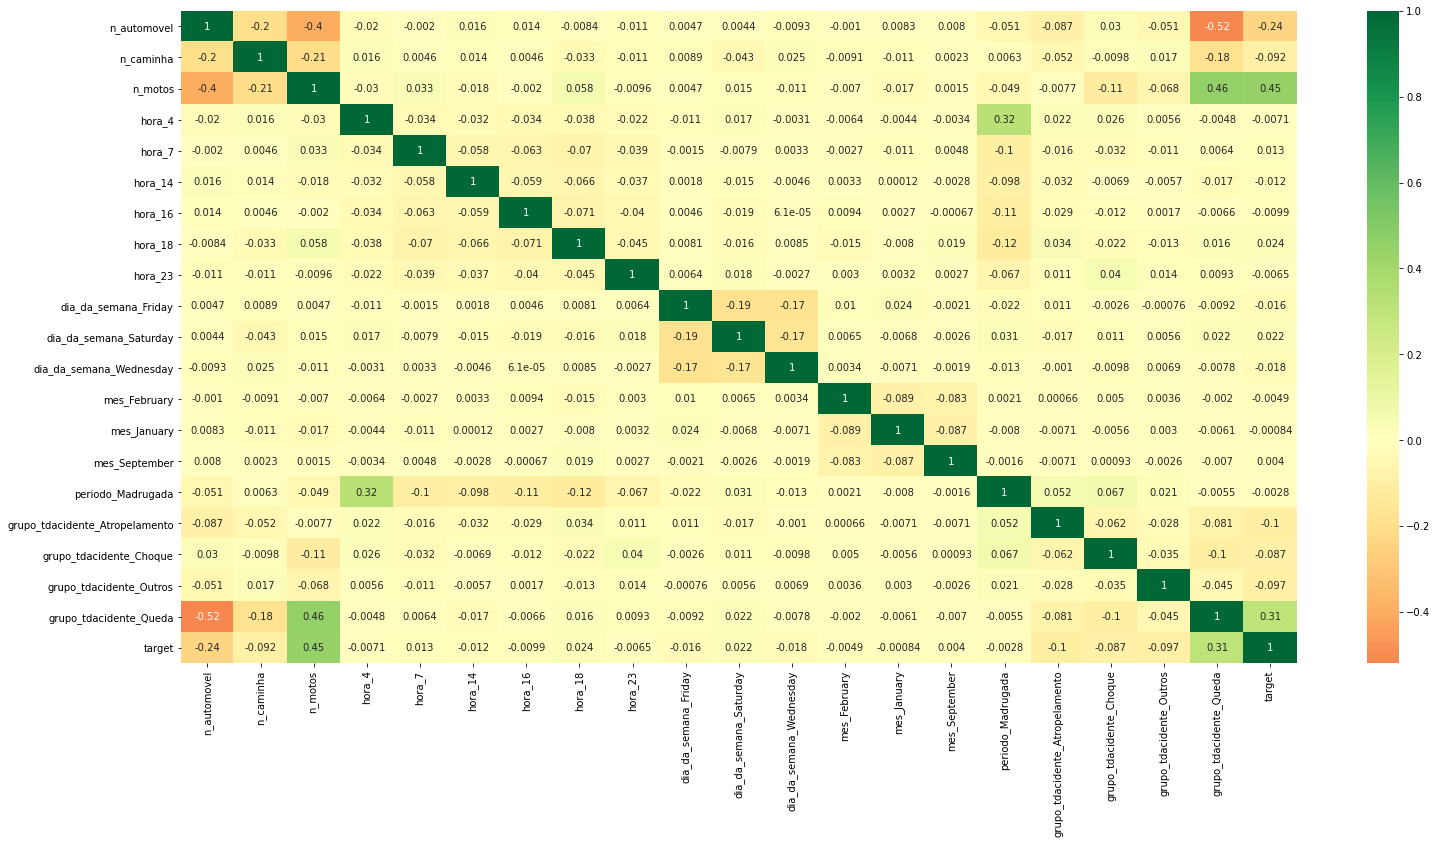

In [ ]:
plt.figure(figsize=(25,12))
p = sns.heatmap(data=tdfmod.corr(method='spearman'), annot=True, cmap='RdYlGn', center=0)

# Modelo Preditivo

**Objetivo do Modelo**: Identificar os fatores que impactam (positivamente ou negativamente) os desfechos dos acidentes com vítima. 

**Variável dependente**: target (1 - a ocorrência foi com vítima fatal ou ferida e 0 sem vítima):

**Resultados Alcançados**: 

- Poder explicativo - Pseudo R2 - 18%;
- Acurácia - 75%;
- **Fatores que aumentam as chances do acidente ter desfechos com vítima**: bicicleta, motos, capotamento e acidentes com queda. 
- **Fatores que reduzem as chances de acidentes com vítimas**: automovel, caminhão, os horários  7, 11, 16 e 21 horas, periodo da madrugada, dia de segunda-feiram, meses de agosto, junho e outubro. 


### Divisão e padronização

In [ ]:
# Dividindo o dataframe (tdf) entre variáveis explicativas (X) e de resposta (Y)
X = tdfmod.drop('target', axis=1)
y = tdfmod.target

# padronizando
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [ ]:
# separando o conjunto treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
   tdfmod.drop(labels=['target'], axis=1),
    tdfmod['target'],
    test_size=0.3,
    random_state=123)

## Regressão Logistica

In [ ]:
# instância o classificador com nome logit
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)
print("Matriz Confusão \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Matriz Confusão 
 [[4768  422]
 [1735 1959]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.82      5190
           1       0.82      0.53      0.64      3694

    accuracy                           0.76      8884
   macro avg       0.78      0.72      0.73      8884
weighted avg       0.77      0.76      0.74      8884



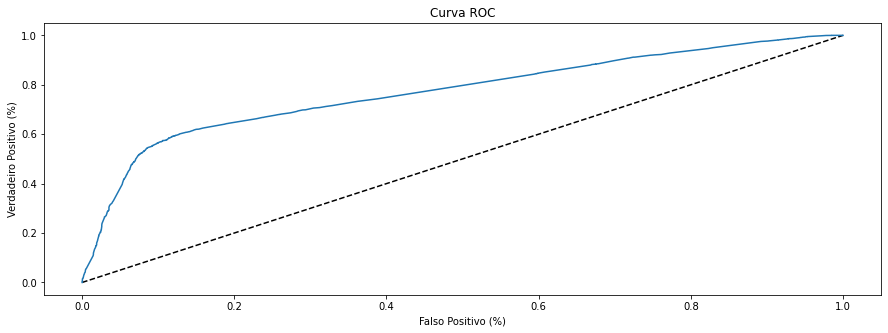

In [ ]:
# computa probabilidades
y_pred_prob = logit.predict_proba(X_test)[:,1]

# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# curva ROC
plt.figure(figsize=(15,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('Falso Positivo (%)')
plt.ylabel('Verdadeiro Positivo (%)')
plt.title('Curva ROC')
plt.show()

In [ ]:
# Sumarinado os resultados do modelo estimado
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.556032
         Iterations 7
                                    Results: Logit
Model:                      Logit                   Pseudo R-squared:        0.177     
Dependent Variable:         target                  AIC:                     23089.7386
Date:                       2021-07-28 22:46        BIC:                     23248.5224
No. Observations:           20727                   Log-Likelihood:          -11525.   
Df Model:                   19                      LL-Null:                 -14009.   
Df Residuals:               20707                   LLR p-value:             0.0000    
Converged:                  1.0000                  Scale:                   1.0000    
No. Iterations:             7.0000                                                     
---------------------------------------------------------------------------------------
                                        Coef.  Std.Err.

## Outros modelos de Classificação

A intenção ao propor  outros modelos de classificação, seria de comparar o desempenho destes com o modelo de referência logísitco. No geral, a acuracia dos modelos se mostraram próximo ou igual ao modelo logistico. 

Ao evidenciar esses resultados, só corrobora com fato há outros fatores não elencados que influência o tipo de desfecho das ocorrências com vítima. 

Acuracia dos Modelos: 

- KNN - 72%
- Decision Tree Classifier - 76%
- Support Vector Machines - 75%


### K-Nearest Neighbors (kNN)

In [ ]:
# Criando modelo e treinando com os dados de treino
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
resultado_knn = knn.predict(X_test)
print('matriz de confusão:')
print(confusion_matrix(y_pred, y_test),'\n')
# Principais métricas de performance
print(classification_report(y_test, resultado_knn))

matriz de confusão:
[[4768 1735]
 [ 422 1959]] 

              precision    recall  f1-score   support

           0       0.73      0.84      0.78      5190
           1       0.71      0.56      0.63      3694

    accuracy                           0.72      8884
   macro avg       0.72      0.70      0.70      8884
weighted avg       0.72      0.72      0.72      8884



### Decision Tree Classifier

In [ ]:
# Criando modelo e treinando com os dados de treino
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
resultado_dtc = dtc.predict(X_test)
print(confusion_matrix(y_pred, y_test),"\n")
# Principais métricas de performance
print(classification_report(y_test, resultado_dtc))

[[4768 1735]
 [ 422 1959]] 

              precision    recall  f1-score   support

           0       0.74      0.91      0.81      5190
           1       0.80      0.54      0.65      3694

    accuracy                           0.76      8884
   macro avg       0.77      0.73      0.73      8884
weighted avg       0.76      0.76      0.74      8884



### Support Vector Machines

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

svm_cm = confusion_matrix(y_pred, y_test)

print('matriz de confusão:')
print(svm_cm, '\n')
# Principais métricas de performance
print(classification_report(y_test, y_pred))

matriz de confusão:
[[4705 1747]
 [ 485 1947]] 

              precision    recall  f1-score   support

           0       0.73      0.91      0.81      5190
           1       0.80      0.53      0.64      3694

    accuracy                           0.75      8884
   macro avg       0.76      0.72      0.72      8884
weighted avg       0.76      0.75      0.74      8884



# Considerações Finais

Essa é uma das situações em que outros modelos de aprendizado não são necessários para prever os desfechos da ocorrência dos acidentes. O modelo de regressão logística proposto funciona da mesma maneira que outros modelos de aprendizado avançados, além disso permitiu uma interpretação dos atributos que estão correlacionados com variável resposta (target). O modelo explicou apenas 17,7% da variabilidade da variável resposta (ocorrência com vítima e sem vítima). Os 74% restantes, consistem em outros atributos não incluídos no modelo (volume de trafego na rodovia, dados do motorista, e etc...) que poderiam ser acrescentados.

Sugestões para trabalhos Futuros: 

- Entende um pouco mais dos trechos administrados pela ECO101, identificando ponto cruciais e importante para aumentar a qualidade do modelo (por exemplo, trechos em centro urbanos)
- Acessar outras fontes de dados (Por exemplo: volume de tráfego por trecho, dados o motorista) da ANTT em buscar informações relevantes, incorporando mais qualidade ao modelo


